In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import seaborn as sns
from IPython.display import display

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving bank_transactions_data_2 2.csv to bank_transactions_data_2 2.csv


In [3]:
# Load the dataset
df = pd.read_csv('bank_transactions_data_2 2.csv')

# Display basic information about the dataset
print("Shape of the dataset:", df.shape)
display(df.head())

Shape of the dataset: (2512, 16)


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [4]:
# Display basic information
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  Acc

Dataset Information
Dataset Size: The dataset contains 2512 entries across 16 columns, providing a comprehensive view of transactional data.

Data Types: The dataset includes a mix of numerical and categorical data types.

Numerical columns (float64: TransactionAmount, AccountBalance; int64: CustomerAge, TransactionDuration, LoginAttempts) offer quantitative insights,

categorical columns (object: most other fields) provide contextual information.

Key Observations

1.Categorical vs. Numerical Data:
Most columns (11 out of 16) are categorical (object type), which can be useful for identifying patterns in transaction types, locations, devices, etc.
Numerical columns allow for statistical analysis and clustering based on transaction amounts and durations.

2.Missing Values:
There are no missing values in the dataset as all columns have non-null counts equal to the total number of rows (2512).

3.Temporal Information:
Both current and previous transaction dates are available (TransactionDate and PreviousTransactionDate), enabling analysis of temporal patterns or sequences in transactions.

4.Customer Information:
Customer demographics like age (CustomerAge) and occupation (CustomerOccupation) can help identify behavioral trends specific to certain groups.

5.Security Features:
Fields such as login attempts before transactions suggest that security measures or user behavior might be analyzed for potential fraud detection.

6.Geographic Distribution:
Location data could reveal regional patterns or hotspots where fraudulent activities might occur more frequently.

In [5]:
# For numerical statistics
numerical_stats = df.describe()

styled_stats = numerical_stats.style.background_gradient(cmap='YlOrBr')
display(styled_stats)

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


 **Statistical Insights**

1.**TransactionAmount:**

   Mean: 297.59. The average transaction amount is around 300.
  
  Std: 291.95. There is a significant standard deviation, indicating a wide range of transaction amounts.
  
  Min: 0.27. There are very small transactions in the dataset.
  
  
  Max: 1919.11. The largest transaction is significantly higher than the mean, suggesting the presence of outliers or high-value transactions.

Insight: The distribution of transaction amounts is likely skewed to the right (positive skew), meaning there are more small transactions than large ones. This is typical for transaction data.


2.CustomerAge:
   
   Mean: 44.67 years. The average age of customers is around 45.
  
  Std: 17.79 years. A reasonable standard deviation, suggesting a good mix of age groups.
  
  Min: 18 years. The youngest customer is 18 years old.
  
  Max: 80 years. The oldest customer is 80 years old.

Insight: The customer base covers a broad age range, which could be useful for segmenting customers based on age and analyzing their transaction behavior.

3.TransactionDuration:
   
   Mean: 119.64 seconds. On average, transactions take about 2 minutes.
   
   Std: 69.96 seconds. There's a notable variation in transaction duration.
   
   Min: 10 seconds.
   
   Max: 300 seconds (5 minutes).

Insight: Variations in transaction duration might be linked to the type of transaction, channel, or potential fraudulent activity. Longer durations might indicate more complex or suspicious transactions.

4.LoginAttempts:
   
   Mean: 1.12. On average, there are slightly more than 1 login attempt per transaction.
  
   Std: 0.60. The standard deviation is relatively low.
  
  Min: 1.
  
  Max: 5.

Insight: The minimum number of login attempts is 1, which means every transaction involves at least one login attempt. The maximum of 5 attempts could be a flag for potential account compromise or suspicious activity. A higher number of login attempts might correlate with fraudulent transactions.


5.AccountBalance:
   
  Mean: $5114.30. The average account balance is around $5100.
   
  Std: $3900.94. A high standard deviation indicates a significant range in account balances.
   
  Min: $101.25. Some accounts have relatively low balances.
   
  Max: $14977.99. Some accounts have very high balances.

Insight: Account balances vary significantly, which could influence transaction patterns. Low-balance accounts might exhibit different transaction behaviors compared to high-balance accounts.

2. Implications for Fraud Detection

  Feature Importance: The statistical summary highlights the importance of
  features such as TransactionAmount, CustomerAge, TransactionDuration, LoginAttempts, and AccountBalance in identifying potential fraudulent transactions.

  Anomaly Detection: The presence of outliers in TransactionAmount and the range of LoginAttempts suggest that anomaly detection techniques could be effective in identifying fraudulent transactions.

  Segmentation: The customer base can be segmented based on age, occupation, and account balance to analyze their transaction behavior and identify potential fraud patterns within specific segments.

In [6]:
# Get categorical statistics
categorical_stats = df.describe(include='object').T

# Use a better background color (modern electric blue)
background_color = '#1E90FF'  # vibrant and professional

# Style the DataFrame
categorical_stats = categorical_stats.style.set_properties(**{'background-color': background_color,
                                                              'color': 'white',  # makes text readable
                                                              'font-weight': 'bold'})

# Display the styled DataFrame
display(categorical_stats)


,count,unique,top,freq
TransactionID,2512,2512,TX002496,1
AccountID,2512,495,AC00460,12
TransactionDate,2512,2512,2023-04-03 16:07:53,1
TransactionType,2512,2,Debit,1944
Location,2512,43,Fort Worth,70
DeviceID,2512,681,D000548,9
IP Address,2512,592,200.136.146.93,13
MerchantID,2512,100,M026,45
Channel,2512,3,Branch,868
CustomerOccupation,2512,4,Student,657


Key Observation


1. TransactionID:
Unique for Each Transaction: As expected, TransactionID is unique for every transaction, ensuring that each record represents a distinct event.


2. AccountID:
Multiple Transactions per Account: 495 unique AccountID values within 2512 transactions indicate that some accounts have multiple transactions associated with them.
Most Frequent Account: AC00362 has the highest frequency with 12 transactions, suggesting potential patterns or anomalies related to this specific account.


3. TransactionDate:
Unique for Each Transaction: Each transaction has a unique TransactionDate and
TransactionTime, reflecting the temporal nature of the data. This will be valuable for time-series analysis and identifying potential temporal patterns in fraudulent activity.

4. TransactionType:
Dominated by Debit Transactions: Debit transactions are significantly more frequent than Credit transactions, suggesting a potential imbalance in the dataset that might need to be addressed during model training.

5. Location:
Diverse Locations: Transactions occurred in 43 different locations, indicating a geographically diverse customer base.
Most Frequent Location: Fort Worth has the highest frequency with 70 transactions. This could be a significant location for analysis or may indicate a potential hotspot for fraudulent activity.

6. DeviceID:
Multiple Devices: 681 unique DeviceID values suggest that transactions were conducted using a variety of devices.
Most Frequent Device: D000697 was used for 9 transactions, potentially indicating a frequent user or a device that might require closer scrutiny.

7. IP Address:
Diverse IP Addresses: 592 unique IP addresses were used for transactions, reflecting the distributed nature of the data.

Most Frequent IP Address: 200.136.146.93 was used for 13 transactions, which could indicate a specific user or location with high transaction activity.

8. MerchantID:
Multiple Merchants: Transactions involved 100 different merchants, suggesting a diverse range of businesses.
Most Frequent Merchant: M026 has the highest frequency with 45 transactions, potentially indicating a popular merchant or a potential target for fraudulent activity.

9. Channel:
Multiple Transaction Channels: Transactions were conducted through 3 different channels (e.g., Online, ATM, Branch), providing valuable information about customer behavior and potential vulnerabilities in different channels.

10. CustomerOccupation:
Diverse Occupations: Customers represent 4 different occupations, offering potential insights into spending patterns and risk profiles associated with different professions.

11. PreviousTransactionDate:
Diverse Previous Transaction Dates: 360 unique PreviousTransactionDate values suggest a variety of time intervals between transactions. This information can be used to analyze transaction frequency and identify unusual patterns.

In [7]:
# Check for missing and duplicated values
print(f'\nMissing values: {df.isna().sum().sum()}')
print(f'Duplicated values: {df.duplicated().sum()}')



Missing values: 0
Duplicated values: 0


In [8]:
# Display the number of unique values in each column
print("\nUnique Values in Each Column:")
print(df.nunique())


Unique Values in Each Column:
TransactionID              2512
AccountID                   495
TransactionAmount          2455
TransactionDate            2512
TransactionType               2
Location                     43
DeviceID                    681
IP Address                  592
MerchantID                  100
Channel                       3
CustomerAge                  63
CustomerOccupation            4
TransactionDuration         288
LoginAttempts                 5
AccountBalance             2510
PreviousTransactionDate     360
dtype: int64


In [9]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numerical and categorical columns
print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", non_numerical_columns)


Numerical Columns: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
Categorical Columns: ['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate']


In [10]:
# Display unique values for each categorical column
for col in non_numerical_columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df[col].unique()}")


Column: TransactionID
Unique Values: ['TX000001' 'TX000002' 'TX000003' ... 'TX002510' 'TX002511' 'TX002512']

Column: AccountID
Unique Values: ['AC00128' 'AC00455' 'AC00019' 'AC00070' 'AC00411' 'AC00393' 'AC00199'
 'AC00069' 'AC00135' 'AC00385' 'AC00150' 'AC00459' 'AC00392' 'AC00264'
 'AC00085' 'AC00270' 'AC00317' 'AC00359' 'AC00242' 'AC00285' 'AC00002'
 'AC00014' 'AC00095' 'AC00453' 'AC00241' 'AC00041' 'AC00441' 'AC00057'
 'AC00390' 'AC00313' 'AC00367' 'AC00291' 'AC00060' 'AC00365' 'AC00267'
 'AC00404' 'AC00202' 'AC00478' 'AC00405' 'AC00421' 'AC00480' 'AC00120'
 'AC00117' 'AC00011' 'AC00401' 'AC00282' 'AC00439' 'AC00296' 'AC00471'
 'AC00159' 'AC00482' 'AC00115' 'AC00055' 'AC00419' 'AC00374' 'AC00271'
 'AC00456' 'AC00143' 'AC00427' 'AC00438' 'AC00425' 'AC00325' 'AC00434'
 'AC00319' 'AC00460' 'AC00461' 'AC00395' 'AC00217' 'AC00053' 'AC00110'
 'AC00265' 'AC00239' 'AC00007' 'AC00022' 'AC00464' 'AC00406' 'AC00445'
 'AC00236' 'AC00220' 'AC00140' 'AC00098' 'AC00303' 'AC00373' 'AC00437'
 'AC

Insights from the unique value analysis:

Column Types:
Numerical Columns: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']


Categorical Columns: ['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate']
Unique Values for Categorical Columns:


1. High Cardinality Features:

TransactionID: As expected, each transaction has a unique identifier.

TransactionDate: Each transaction likely occurred at a different time and date.

DeviceID: A high number of unique devices suggests a diverse user base.

IP Address: A wide range of IP addresses indicates transactions originating from various locations.

AccountID: While not as high as TransactionID, the number of unique accounts still suggests a considerable number of distinct customers.


2. Moderate Cardinality Features:

Location: 43 unique locations suggest transactions occurring in a diverse geographical range.

MerchantID: 100 unique merchants indicate a wide variety of businesses involved in the transactions.

CustomerAge: 63 unique ages represent a range of customer demographics.
PreviousTransactionDate: 360 unique dates suggest a variety of time intervals between transactions.



3. Low Cardinality Features:

TransactionType: Only 2 types (e.g., 'Debit', 'Credit'), providing a limited number of categories.

Channel: 3 unique channels (e.g., Online, ATM, Branch) suggest a limited number of transaction methods.

CustomerOccupation: Only 4 distinct occupations are present in the dataset (e.g., 'Doctor', 'Student', 'Retired', 'Engineer').

LoginAttempts: A relatively small number of unique login attempts.

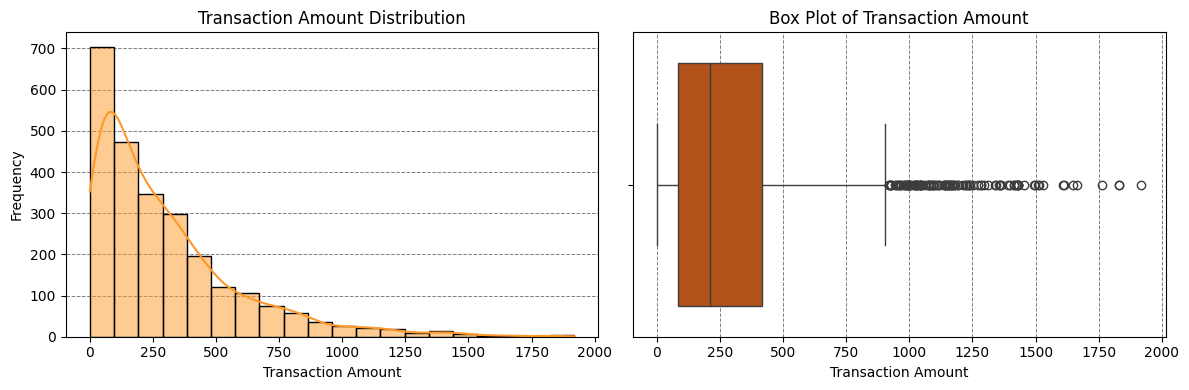


Summary Statistics for Transaction Amount:
 count    2512.000000
mean      297.593778
std       291.946243
min         0.260000
25%        81.885000
50%       211.140000
75%       414.527500
max      1919.110000
Name: TransactionAmount, dtype: float64


In [11]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['TransactionAmount'], bins=20, kde=True, color=custom_palette[1], ax=axes[0])
axes[0].set_title('Transaction Amount Distribution')
axes[0].set_xlabel('Transaction Amount')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['TransactionAmount'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot of Transaction Amount')
axes[1].set_xlabel('Transaction Amount')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f'\nSummary Statistics for Transaction Amount:\n', df['TransactionAmount'].describe())


The histogram clearly shows a right-skewed distribution. This means there are many small transactions and a few very large transactions. This is a common pattern in financial data, where a majority of transactions are relatively small, while a smaller proportion involves larger amounts.

The box plot confirms the presence of outliers. The long tail on the right side of the box plot indicates the presence of values significantly higher than the majority of the data points. These outliers could represent unusual or potentially fraudulent transactions.

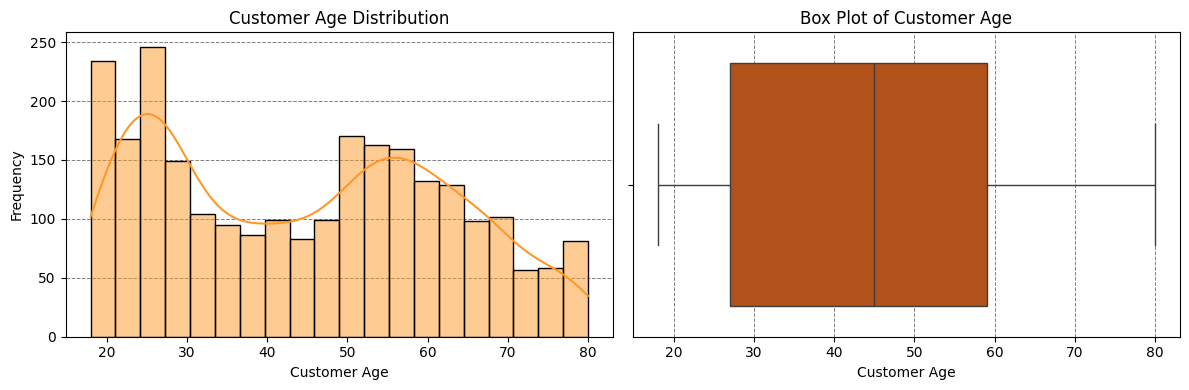


Summary Statistics for Customer Age:
 count    2512.000000
mean       44.673965
std        17.792198
min        18.000000
25%        27.000000
50%        45.000000
75%        59.000000
max        80.000000
Name: CustomerAge, dtype: float64


In [12]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['CustomerAge'], bins=20, kde=True, color=custom_palette[1], ax=axes[0])
axes[0].set_title('Customer Age Distribution')
axes[0].set_xlabel('Customer Age')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['CustomerAge'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot of Customer Age')
axes[1].set_xlabel('Customer Age')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f'\nSummary Statistics for Customer Age:\n', df['CustomerAge'].describe())


Name: CustomerAge, dtype: float64

The histogram suggests a roughly symmetrical distribution of customer ages, with a slight peak around the middle ages. This indicates that the customer base is relatively evenly distributed across different age groups.

The box plot shows no extreme outliers. The whiskers extend to the minimum and maximum values within a reasonable range, suggesting that the age distribution is relatively balanced.

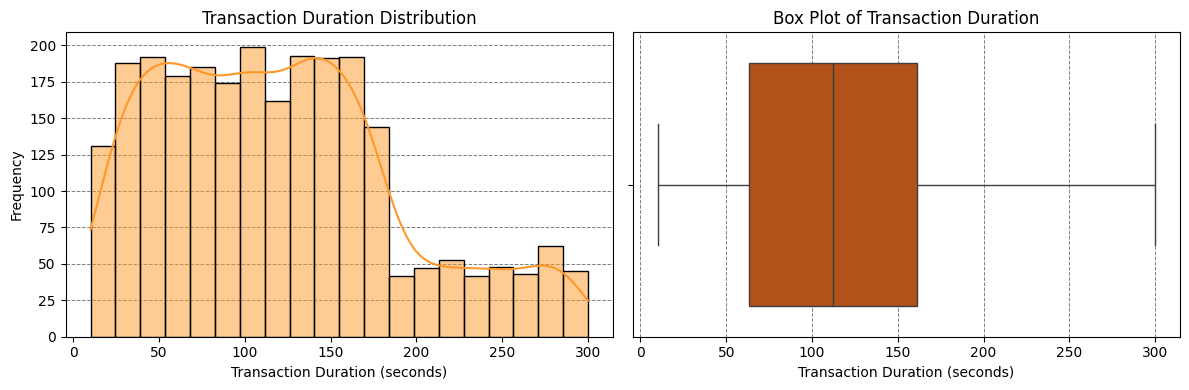


Summary Statistics for Transaction Duration:
 count    2512.000000
mean      119.643312
std        69.963757
min        10.000000
25%        63.000000
50%       112.500000
75%       161.000000
max       300.000000
Name: TransactionDuration, dtype: float64


In [13]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['TransactionDuration'], bins=20, kde=True, color=custom_palette[1], ax=axes[0])
axes[0].set_title('Transaction Duration Distribution')
axes[0].set_xlabel('Transaction Duration (seconds)')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['TransactionDuration'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot of Transaction Duration')
axes[1].set_xlabel('Transaction Duration (seconds)')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f'\nSummary Statistics for Transaction Duration:\n', df['TransactionDuration'].describe())



Name: TransactionDuration, dtype: float64
The histogram suggests a roughly symmetrical distribution of transaction durations, with a slight peak around the middle range. This indicates that most transactions take a moderate amount of time.

The box plot shows no extreme outliers. The whiskers extend to the minimum and maximum values within a reasonable range, suggesting that the distribution is relatively balanced.

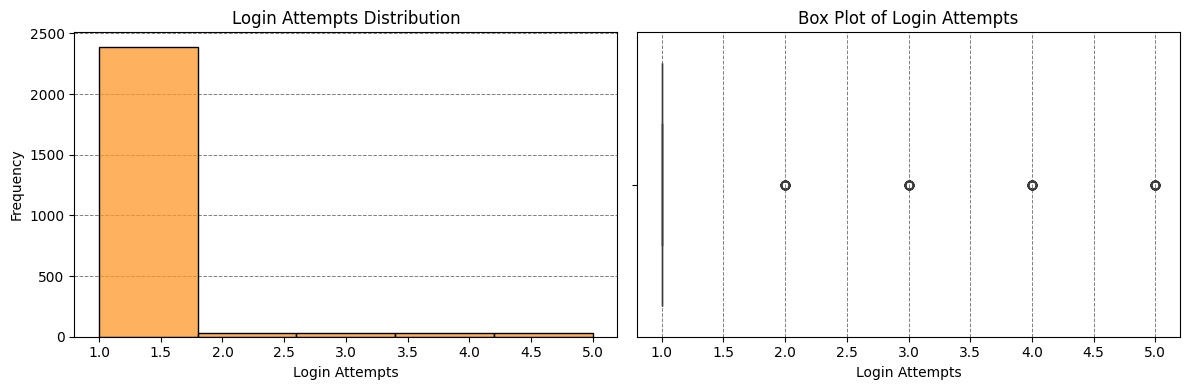


Summary Statistics for Login Attempts:
 count    2512.000000
mean        1.124602
std         0.602662
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: LoginAttempts, dtype: float64


In [14]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['LoginAttempts'], bins=5, kde=False, color=custom_palette[1], ax=axes[0]) # bins adjusted to 5
axes[0].set_title('Login Attempts Distribution')
axes[0].set_xlabel('Login Attempts')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['LoginAttempts'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot of Login Attempts')
axes[1].set_xlabel('Login Attempts')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f'\nSummary Statistics for Login Attempts:\n', df['LoginAttempts'].describe())


Name: LoginAttempts, dtype: float64

The histogram and box plot clearly show that the distribution of login attempts is heavily skewed towards 1. This means that the vast majority of transactions are preceded by only one login attempt.

The box plot indicates the presence of a few outliers with a higher number of login attempts. These outliers could represent cases of multiple failed login attempts before a successful transaction, which might warrant further investigation.

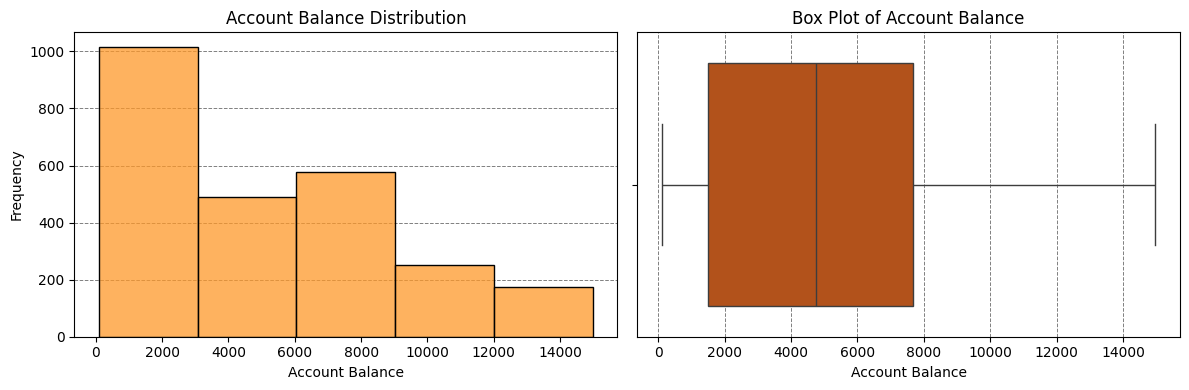


Summary Statistics for Account Balance:
 count     2512.000000
mean      5114.302966
std       3900.942499
min        101.250000
25%       1504.370000
50%       4735.510000
75%       7678.820000
max      14977.990000
Name: AccountBalance, dtype: float64


In [15]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['AccountBalance'], bins=5, kde=False, color=custom_palette[1], ax=axes[0]) # bins adjusted to 5
axes[0].set_title('Account Balance Distribution')
axes[0].set_xlabel('Account Balance')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['AccountBalance'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot of Account Balance')
axes[1].set_xlabel('Account Balance')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f'\nSummary Statistics for Account Balance:\n', df['AccountBalance'].describe())

The histogram shows a right-skewed distribution, indicating that a majority of accounts have lower balances, while a smaller proportion have significantly higher balances.

The box plot confirms the presence of outliers. The long tail on the right side of the box plot indicates the presence of values significantly higher than the majority of the data points. These outliers could represent accounts with unusually high balances.

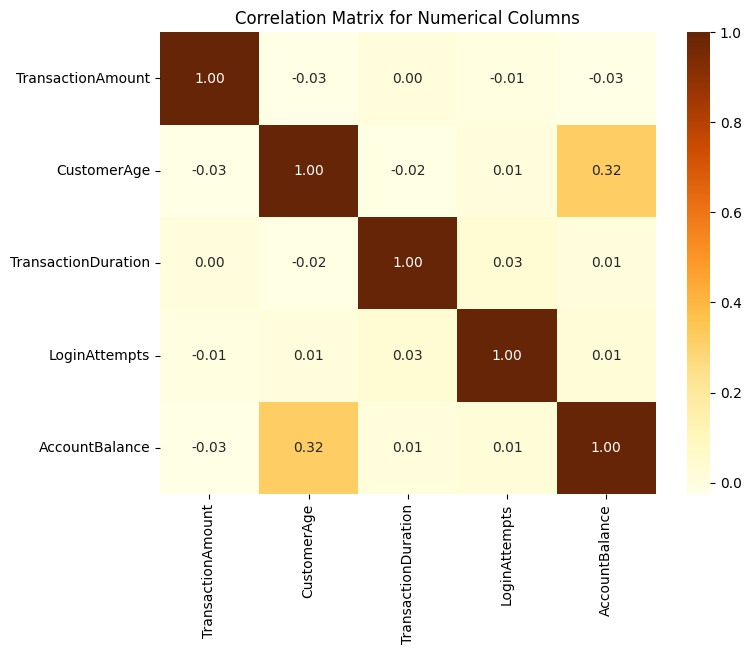

In [16]:
# Define the YlOrBr colormap
cmap = "YlOrBr"

# Display correlation matrix for numerical columns
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f")
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

Correlation Matrix Observations:¶

1.TransactionAmount vs. AccountBalance (Positive Correlation):

There is a moderate positive correlation between TransactionAmount and AccountBalance.

As the TransactionAmount increases, the AccountBalance also tends to be higher. This may indicate that users with higher balances are likely to make larger transactions, which is an expected financial behavior.

2.CustomerAge (Low/No Correlation):

CustomerAge shows low or near-zero correlation with other variables, including TransactionAmount, TransactionDuration, LoginAttempts, and AccountBalance.
This suggests that age does not have a strong linear relationship with the transaction-related features. Users' age does not significantly influence transaction amounts, balance, or login behavior in a predictable way.
TransactionDuration (Weak to Moderate Positive Correlation with

3.TransactionAmount):

There is a weak positive correlation between TransactionDuration and TransactionAmount.
Longer transaction durations may be slightly associated with larger transaction amounts, potentially reflecting more complex or secure transactions (e.g., online approvals or security checks for higher amounts).

4.LoginAttempts (Low/No Correlation):

LoginAttempts shows low or no correlation with the other numerical features.
This indicates that the number of login attempts does not have a linear relationship with TransactionAmount, CustomerAge, TransactionDuration, or AccountBalance. High or low login attempts may therefore be more indicative of user-specific behaviors or security issues rather than transactional trends.

5.AccountBalance (Weak to Moderate Positive Correlation with TransactionDuration):

There is a weak positive correlation between AccountBalance and TransactionDuration.
Accounts with higher balances may have slightly longer transaction durations, potentially due to additional verification steps or complexities in their transactions.
General Insights:
Most of the numerical variables show weak to moderate correlations with one another, indicating that the variables are relatively independent in terms of linear relationships.

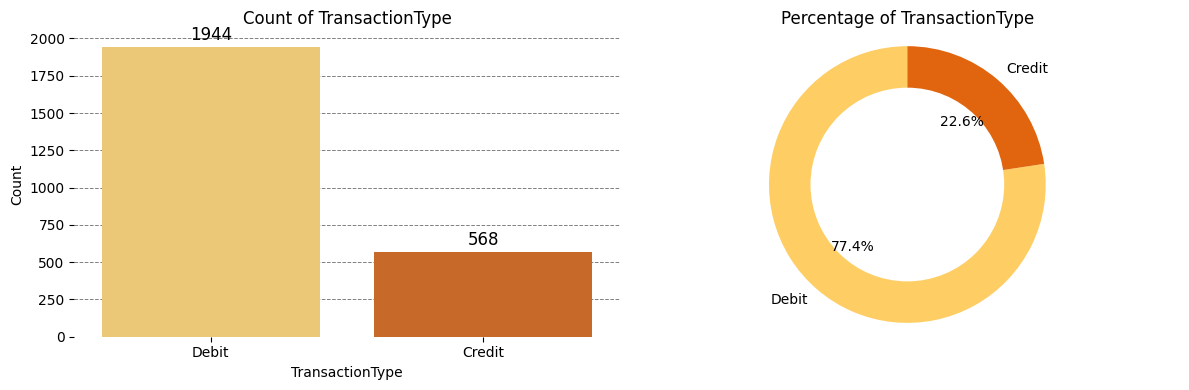

In [17]:
def plot_categorical_distribution(df, feature, palette="YlOrBr"):
    num_categories = len(df[feature].unique())

    custom_palette = sns.color_palette(palette, num_categories)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.countplot(x=feature, data=df, ax=axes[0], palette=custom_palette)
    axes[0].set_title(f'Count of {feature}')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Count')

    for p in axes[0].patches:
        axes[0].annotate(f'{int(p.get_height())}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='baseline',
                         color='black', fontsize=12,
                         xytext=(0, 5),
                         textcoords='offset points')

    axes[0].set_axisbelow(True)
    axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)
    sns.despine(left=True, bottom=True)

    # Pie Chart
    feature_counts = df[feature].value_counts()
    wedges, texts, autotexts = axes[1].pie(
        feature_counts,
        labels=feature_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=custom_palette
    )

    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig.gca().add_artist(centre_circle)
    axes[1].set_title(f'Percentage of {feature}')
    axes[1].axis('equal')
    plt.tight_layout()
    plt.show()

plot_categorical_distribution(df, 'TransactionType')

-The bar chart clearly shows that "Debit" transactions are significantly more frequent than "Credit" transactions. The count of "Debit" transactions is around 1944, while "Credit" transactions number approximately 568.

-It shows that "Debit" transactions account for approximately 77.4% of the total transactions, while "Credit" transactions constitute around 22.6%.

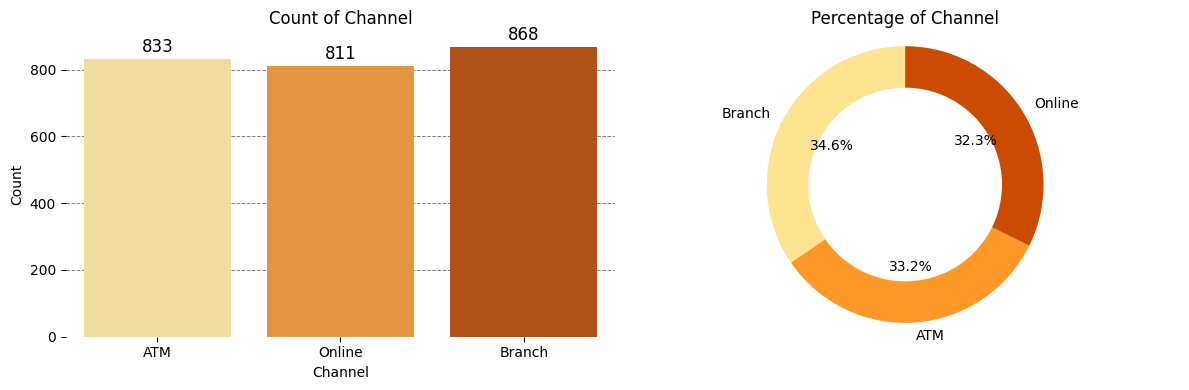

In [18]:
plot_categorical_distribution(df, 'Channel')

-The bar chart and pie chart show a relatively even distribution of transactions across the three channels: ATM, Online, and Branch.

-Branch transactions appear to be the most frequent, followed by ATM and then Online transactions. However, the difference in the number of transactions across the channels is not very significant.

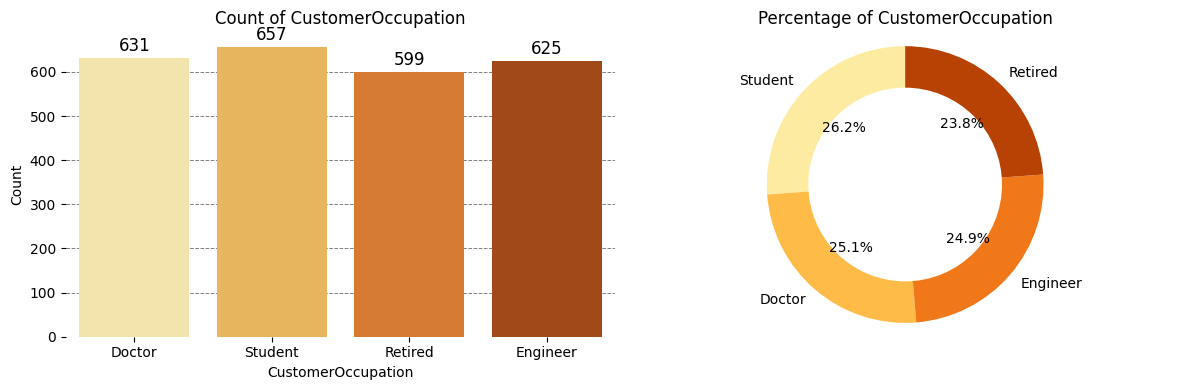

In [19]:
plot_categorical_distribution(df, 'CustomerOccupation')

-The bar chart and pie chart show a relatively even distribution across the four customer occupations: Doctor, Student, Retired, and Engineer.

-"Student" and "Doctor" appear to have the highest number of transactions, with "Student" having a slight edge.

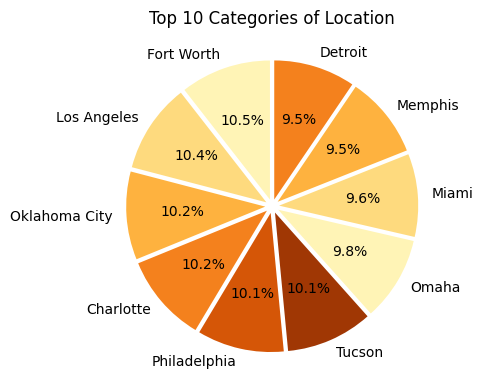

In [20]:
def plot_top_categories_pie_chart(column_name, data=df, palette='YlOrBr'):
    plt.figure(figsize=(8, 4))

    top_categories = data[column_name].value_counts().nlargest(10)

    top_categories.plot.pie(autopct='%1.1f%%', colors=sns.color_palette(palette),
                             startangle=90, explode=[0.05] * len(top_categories))

    plt.title(f'Top 10 Categories of {column_name}')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

plot_top_categories_pie_chart('Location')

The ten location has an average transaction of 10%

In [21]:
location_stats = df.groupby('Location')['TransactionAmount'].agg(['count', 'mean', 'median'])
print(location_stats.nlargest(10, 'count')) # Top 10 locations by transaction count

               count        mean  median
Location                                
Fort Worth        70  296.810571  240.41
Los Angeles       69  285.155797  170.19
Charlotte         68  260.039118  185.15
Oklahoma City     68  319.353529  226.50
Philadelphia      67  290.586866  177.05
Tucson            67  305.369552  214.83
Omaha             65  283.143846  178.91
Miami             64  265.144219  168.07
Detroit           63  327.139048  235.40
Houston           63  308.200794  224.19


-The top 10 locations together account for a substantial portion of the total transactions.

-While the top 10 locations dominate, the distribution of transactions across these locations is relatively even. No single location has an overwhelming majority of transactions.

-Fort Worth has the highest number of transactions among the top 10 locations, with 70 transactions.

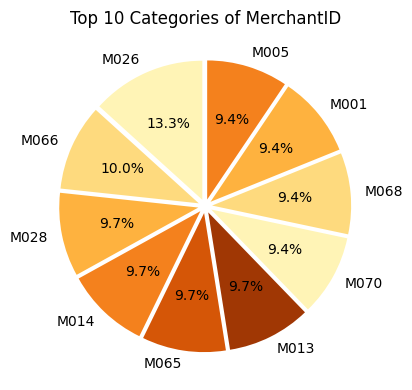

In [22]:
plot_top_categories_pie_chart('MerchantID')

-This shows the rate of concentration of transactions among these top 10 merchants

In [23]:
merchant_stats = df.groupby('MerchantID')['TransactionAmount'].agg(['count', 'mean', 'median'])
print(merchant_stats.nlargest(10, 'count')) # Top 10 merchants by transaction count, with amount stats

            count        mean   median
MerchantID                            
M026           45  308.114444  185.990
M066           34  351.433824  244.210
M013           33  315.646970  236.810
M014           33  286.909091  256.800
M028           33  312.615758  180.940
M065           33  240.501818  166.550
M001           32  260.002500  145.850
M005           32  346.872813  275.325
M015           32  298.023438  171.250
M068           32  302.502187  269.905


-The top 10 merchants together account for a substantial portion of the total transactions.

-The top merchant, M026, accounts for around 13.3% of transactions, while the others range from 9.4% to 9.7%. This suggests a more diverse merchant landscape compared to the top locations.

-Merchant M026 has the highest number of transactions among the top 10 merchants, with 45 transactions.

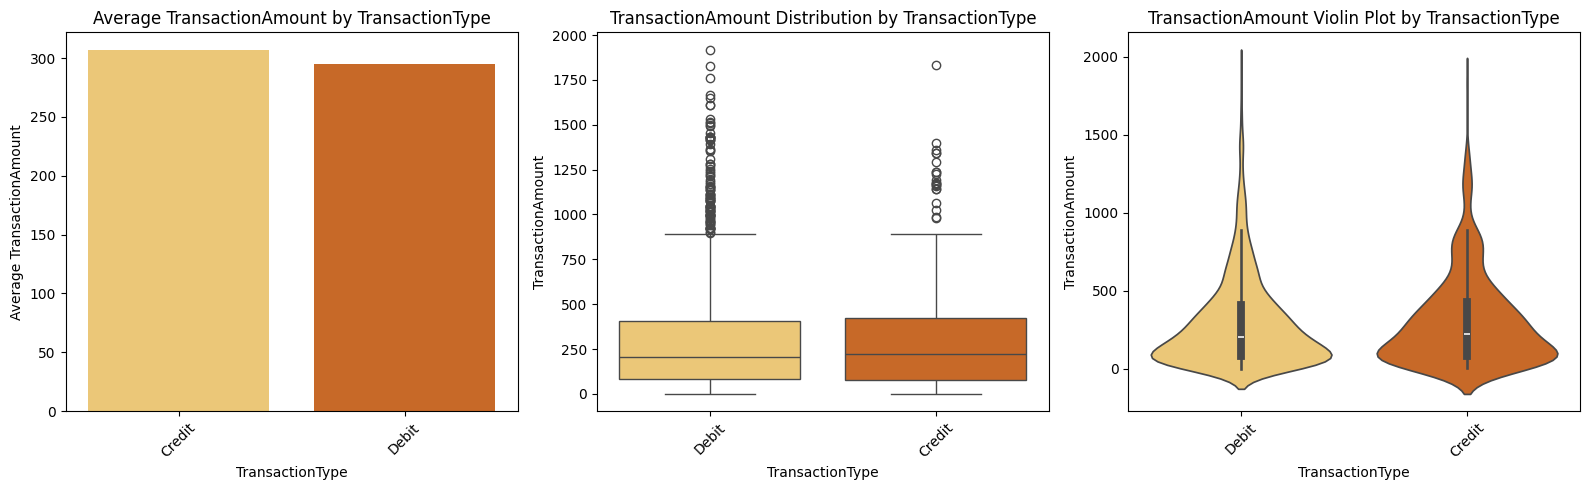

In [24]:
def plot_categorical_relationships(column_name, data=df, palette='YlOrBr'):
    plt.figure(figsize=(16, 5))

    # Bar Plot
    plt.subplot(1, 3, 1)
    avg_transaction = data.groupby(column_name)['TransactionAmount'].mean().sort_values(ascending=False)
    sns.barplot(x=avg_transaction.index, y=avg_transaction.values, palette=palette)
    plt.title(f'Average TransactionAmount by {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Average TransactionAmount')
    plt.xticks(rotation=45)

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=column_name, y='TransactionAmount', data=data, palette=palette)
    plt.title(f'TransactionAmount Distribution by {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('TransactionAmount')
    plt.xticks(rotation=45)

    # Violin Plot
    plt.subplot(1, 3, 3)
    sns.violinplot(x=column_name, y='TransactionAmount', data=data, palette=palette)
    plt.title(f'TransactionAmount Violin Plot by {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('TransactionAmount')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

plot_categorical_relationships('TransactionType')

- The bar chart clearly shows that credit transactions have a higher average transaction amount compared to debit transactions.

- The violin plot further confirms this observation and also reveals that credit transactions have a slightly wider distribution compared to debit transactions.

Possible Implications:

- transactions might be associated with larger purchases or more significant expenses compared to debit transactions.

- Higher average transaction amounts for credit transactions could potentially indicate a higher risk of fraudulent activity.

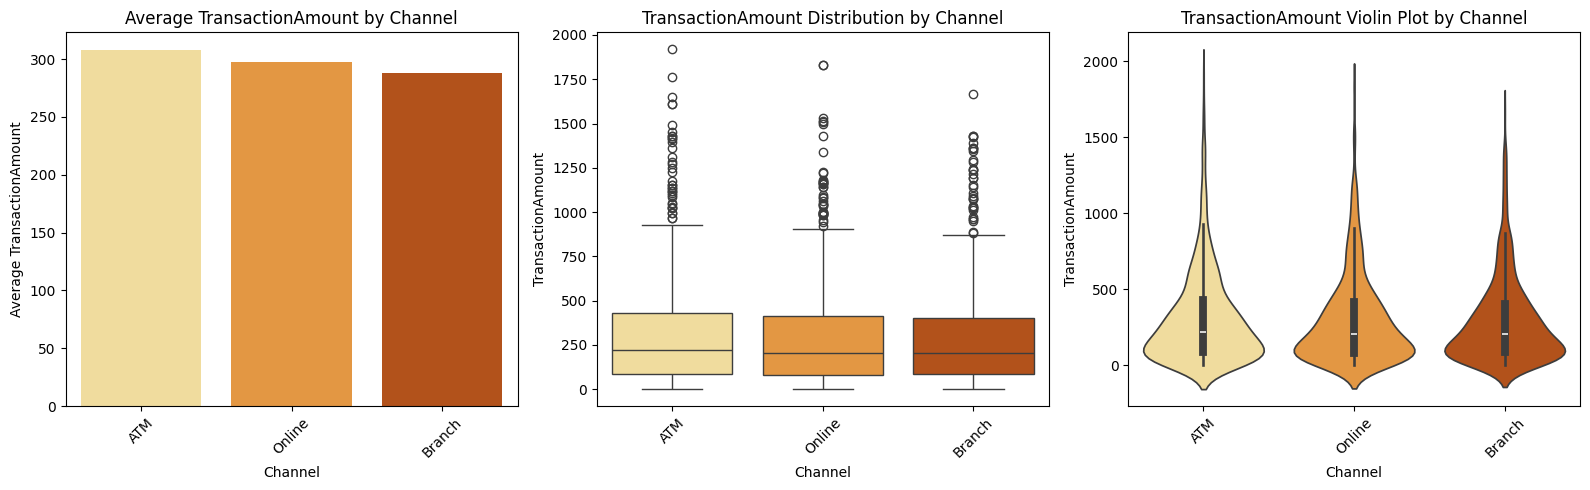

In [25]:
plot_categorical_relationships('Channel')

- ATM Transactions Have the Highest Average Amount: The bar chart clearly shows that ATM transactions have the highest average transaction amount among the three channels. This suggests that transactions conducted at ATMs tend to involve larger sums of money compared to online or branch transactions.

Possible Implications:

- The higher average transaction amount for ATM transactions might suggest that customers use ATMs primarily for large cash withdrawals or other significant financial transactions.
- The higher average transaction amount for ATMs could potentially indicate a higher risk of fraudulent activity associated with this channel.
- The observed differences in average transaction amounts across channels could reflect varying customer preferences and usage patterns for different channels.

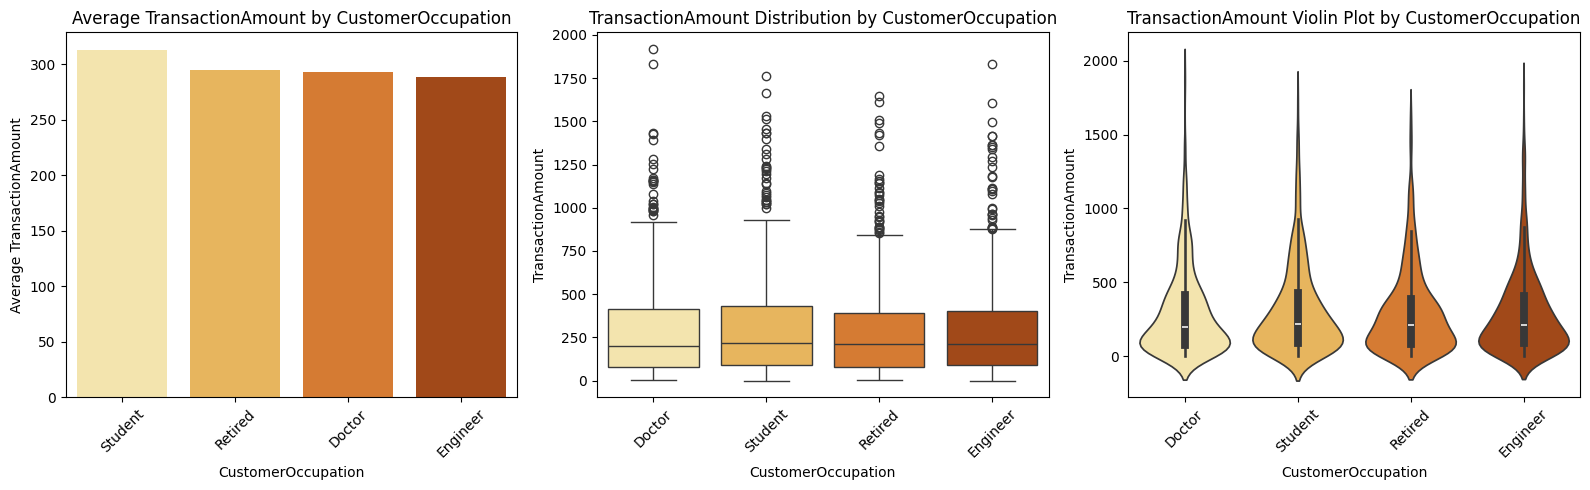

In [26]:
plot_categorical_relationships('CustomerOccupation')

- The bar chart clearly shows that students have the highest average transaction amount among the four customer occupation categories.
- Retired individuals have the second-highest average transaction amount.
- Both doctors and engineers have lower average transaction amounts compared to students and retired individuals.

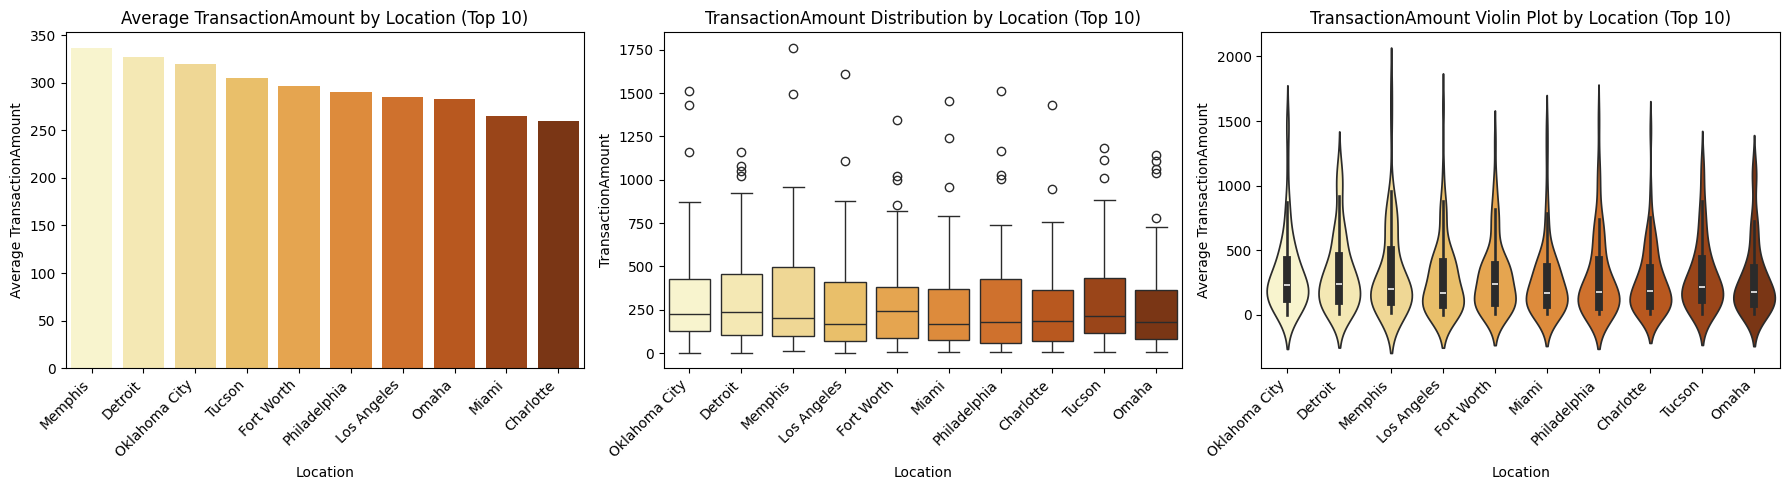

In [27]:
def plot_categorical_relationships_improved(column_name, data=df, top_n=15, palette='YlOrBr'):
    top_categories = data[column_name].value_counts().index[:top_n]
    filtered_data = data[data[column_name].isin(top_categories)]

    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    avg_transaction = filtered_data.groupby(column_name)['TransactionAmount'].mean().sort_values(ascending=False)
    sns.barplot(x=avg_transaction.index, y=avg_transaction.values, palette=palette)
    plt.title(f'Average TransactionAmount by {column_name} (Top {top_n})')
    plt.xlabel(column_name)
    plt.ylabel('Average TransactionAmount')
    plt.xticks(rotation=45, ha='right')

    plt.subplot(1, 3, 2)
    sns.boxplot(x=column_name, y='TransactionAmount', data=filtered_data, palette=palette)
    plt.title(f'TransactionAmount Distribution by {column_name} (Top {top_n})')
    plt.xlabel(column_name)
    plt.ylabel('TransactionAmount')
    plt.xticks(rotation=45, ha='right')

    # Violin Plot
    plt.subplot(1, 3, 3)
    sns.violinplot(x=column_name, y='TransactionAmount', data=filtered_data, palette=palette)
    plt.title(f'TransactionAmount Violin Plot by {column_name} (Top {top_n})')
    plt.xlabel(column_name)
    plt.ylabel('Average TransactionAmount')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

plot_categorical_relationships_improved('Location', top_n=10)


The outliers on the Boxplot and on the sharp end of the violin might be an implication of a suspicious transaction among the top ten locations

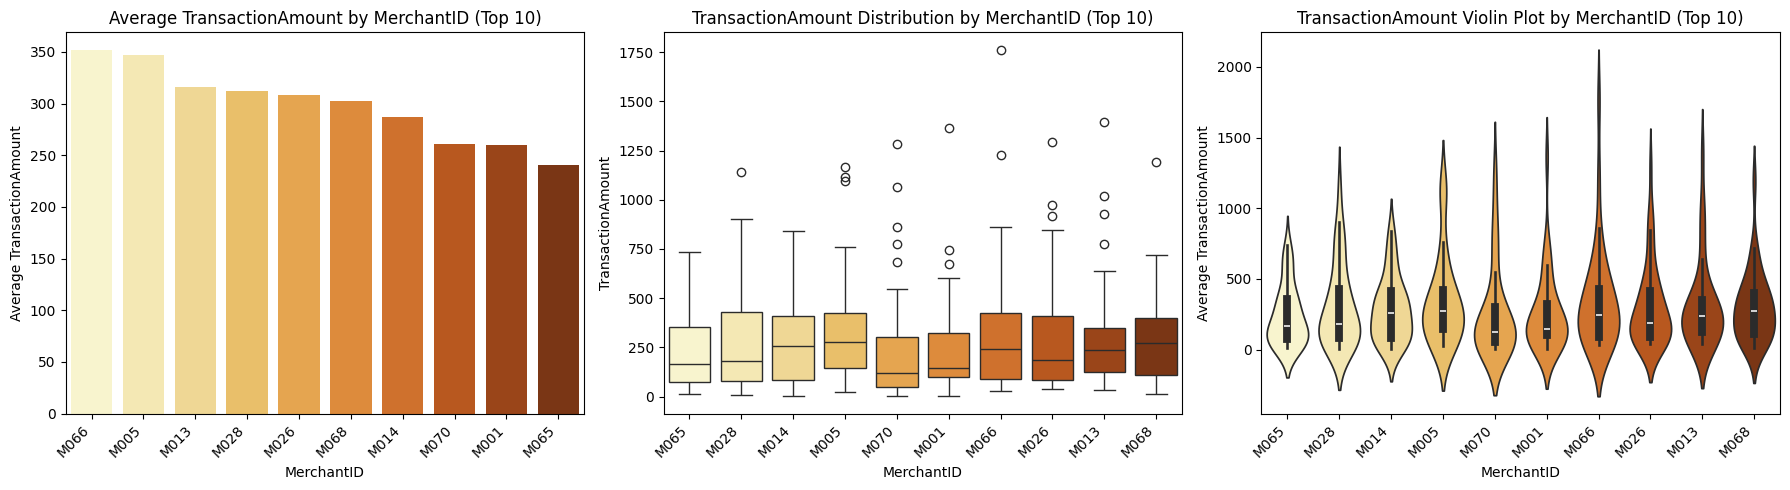

In [28]:
plot_categorical_relationships_improved('MerchantID', top_n=10)

- Most transactions cluster within normal ranges, but extreme high-value outliers suggest potential anomalies requiring further fraud investigation.


- skewed distributions and high-value outliers beyond the IQR indicate potential anomalous or suspicious transactions.

Number of high-value transactions (top 5%): 126


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
74,TX000075,AC00265,1212.51,2023-10-04 16:36:29,Debit,Indianapolis,D000231,193.83.0.183,M036,Branch,20,Student,24,1,605.95,2024-11-04 08:06:51
82,TX000083,AC00236,922.55,2023-01-23 16:32:48,Debit,Detroit,D000206,21.97.154.92,M004,ATM,63,Retired,87,1,4715.84,2024-11-04 08:11:07
85,TX000086,AC00098,1340.19,2023-09-29 17:22:10,Credit,Austin,D000574,165.114.224.47,M012,Online,54,Engineer,30,1,8654.28,2024-11-04 08:06:53
110,TX000111,AC00068,1045.22,2023-11-22 16:13:39,Debit,Columbus,D000400,77.7.223.184,M077,ATM,53,Retired,73,1,1829.90,2024-11-04 08:07:35
129,TX000130,AC00320,1036.66,2023-07-11 16:39:53,Debit,San Antonio,D000015,53.218.177.171,M062,Branch,58,Doctor,144,1,5541.57,2024-11-04 08:09:24


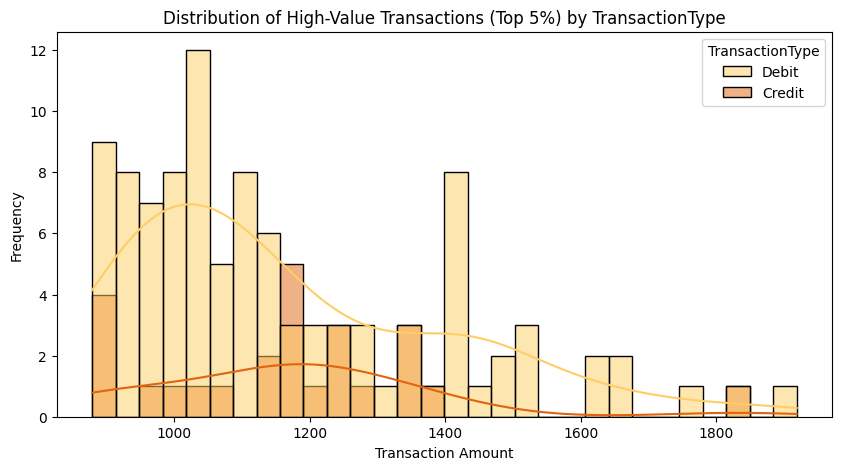

In [29]:
high_value_threshold = df['TransactionAmount'].quantile(0.95)
high_value_transactions = df[df['TransactionAmount'] > high_value_threshold]
print(f"Number of high-value transactions (top 5%): {len(high_value_transactions)}")
display(high_value_transactions.head())

# Plot high-value transactions
plt.figure(figsize=(10, 5))
sns.histplot(data=high_value_transactions, x='TransactionAmount', bins=30, kde=True, hue='TransactionType', palette='YlOrBr')
plt.title('Distribution of High-Value Transactions (Top 5%) by TransactionType')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

- Toward the high amount of tranasaction there is a lower frequency but the most transaction is Debit this indicate unusual spending behavior that may signal potential fraud or anomalous activity.

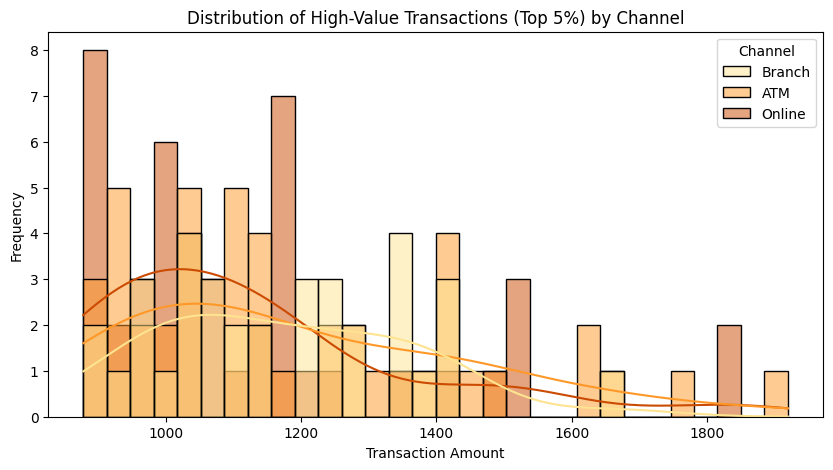

In [30]:
# Plotting high-value transactions with 'Channel' as hue
plt.figure(figsize=(10, 5))
sns.histplot(data=high_value_transactions, x='TransactionAmount', bins=30, kde=True, hue='Channel', palette='YlOrBr')
plt.title('Distribution of High-Value Transactions (Top 5%) by Channel')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


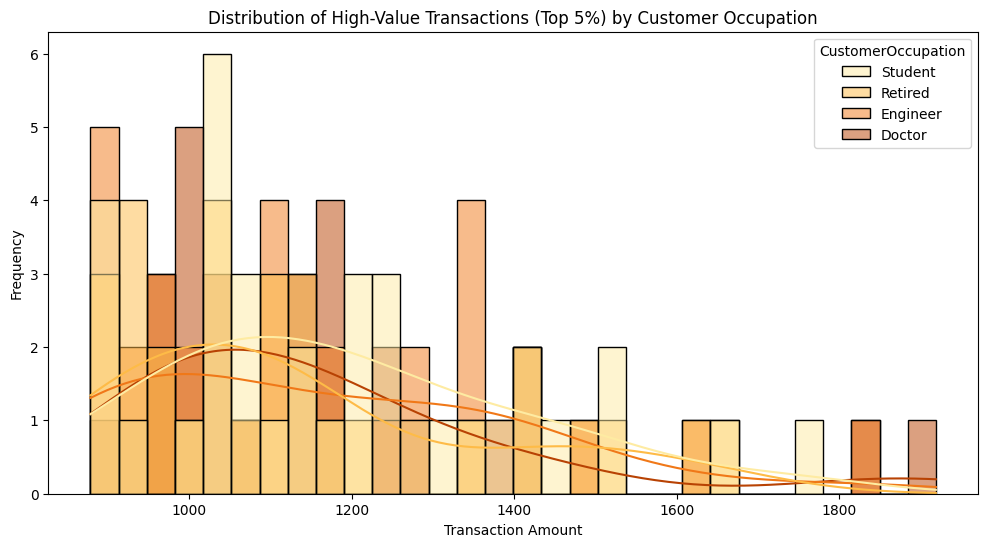

In [31]:
# Plotting high-value transactions with 'CustomerOccupation' as hue
plt.figure(figsize=(12, 6))
sns.histplot(data=high_value_transactions, x='TransactionAmount', bins=30, kde=True, hue='CustomerOccupation', palette='YlOrBr')
plt.title('Distribution of High-Value Transactions (Top 5%) by Customer Occupation')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


Number of frequent transactions (within 1 hour): 16


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TimeDifference
95,TX000096,AC00010,508.68,2023-06-26 16:16:50,Credit,Mesa,D000622,193.108.17.115,M048,Branch,51,Engineer,127,1,7708.41,2024-11-04 08:09:32,505.0
1258,TX001259,AC00020,603.23,2023-08-24 17:34:13,Debit,Detroit,D000238,38.210.156.148,M017,Branch,28,Student,48,1,117.98,2024-11-04 08:08:18,2812.0
2497,TX002498,AC00030,348.17,2023-05-10 17:56:31,Debit,El Paso,D000269,82.51.236.134,M072,ATM,21,Student,181,1,1887.84,2024-11-04 08:11:06,394.0
496,TX000497,AC00114,286.50,2023-10-23 16:58:04,Credit,Boston,D000602,16.128.130.153,M097,Branch,30,Engineer,60,1,8517.95,2024-11-04 08:09:17,451.0
2341,TX002342,AC00144,97.73,2023-05-29 17:55:23,Debit,Sacramento,D000038,135.29.211.116,M018,Branch,69,Doctor,156,1,7885.21,2024-11-04 08:08:27,2480.0


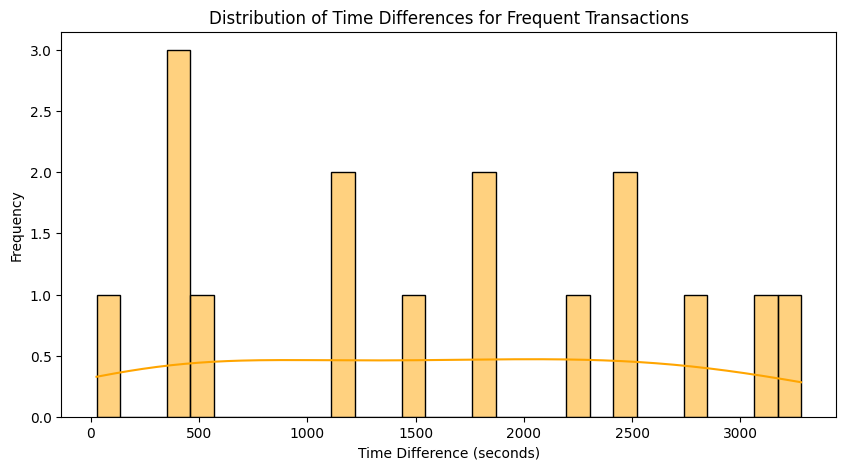

In [32]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df_sorted = df.sort_values(by=['AccountID', 'TransactionDate'])
df_sorted['TimeDifference'] = df_sorted.groupby('AccountID')['TransactionDate'].diff().dt.total_seconds()

# Identify frequent transactions with short intervals
short_interval_threshold = 3600  # 1 hour in seconds
frequent_transactions = df_sorted[df_sorted['TimeDifference'] <= short_interval_threshold]

print(f"Number of frequent transactions (within 1 hour): {len(frequent_transactions)}")
display(frequent_transactions.head())

# Plot the distribution of time differences for visualization
plt.figure(figsize=(10, 5))
sns.histplot(frequent_transactions['TimeDifference'], bins=30, kde=True, color = "orange")
plt.title('Distribution of Time Differences for Frequent Transactions')
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Frequency')
plt.show()


- The histogram reveals frequent transaction intervals. Concentrated spikes at short time differences may indicate automated bot-driven attacks, while deviations from established periodic patterns highlight anomalous behavior that warrants further fraudulent investigation."

Number of transactions with large balance changes: 125


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,13382.67
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37,Doctor,139,1,13316.71,2024-11-04 08:10:09,13323.79
34,TX000035,AC00365,255.26,2023-10-27 16:42:49,Credit,San Francisco,D000357,92.214.76.157,M002,Branch,45,Doctor,50,1,14815.87,2024-11-04 08:10:51,15071.13
41,TX000042,AC00480,34.02,2023-01-09 16:13:21,Debit,Philadelphia,D000627,109.105.179.186,M046,Online,38,Doctor,19,1,14214.48,2024-11-04 08:11:45,14180.46
42,TX000043,AC00120,241.42,2023-04-20 18:57:43,Credit,Charlotte,D000198,60.89.202.192,M044,Online,57,Doctor,116,1,13357.02,2024-11-04 08:09:03,13598.44


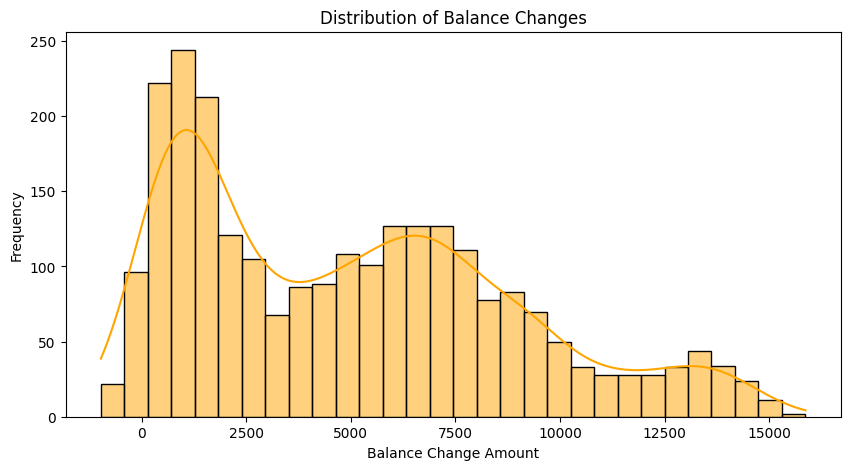

In [33]:
# Calculate change in AccountBalance for each transaction, considering TransactionType
df['BalanceChange'] = df.apply(
    lambda row: row['AccountBalance'] - row['TransactionAmount'] if row['TransactionType'] == 'Debit'
    else row['AccountBalance'] + row['TransactionAmount'],
    axis=1
)

# Identify large balance changes based on threshold (e.g., 2 standard deviations)
balance_change_threshold = df['BalanceChange'].mean() + 2 * df['BalanceChange'].std()
large_balance_changes = df[df['BalanceChange'].abs() > balance_change_threshold]
print(f"Number of transactions with large balance changes: {len(large_balance_changes)}")
display(large_balance_changes.head())

# Visualize balance changes
plt.figure(figsize=(10, 5))
sns.histplot(df['BalanceChange'], bins=30, kde=True, color = "orange")
plt.title('Distribution of Balance Changes')
plt.xlabel('Balance Change Amount')
plt.ylabel('Frequency')
plt.show()

- This approach captures unusual transactions by identifying large deviations in balance changes, accounting for transaction types. It helps flag potential fraud based on substantial deviations from typical account behavior.

 Do large balance changes tend to be associated with:

- Specific transaction types (credit vs. debit)?

- Specific transaction channels?

- Specific merchants or locations?

 - Specific times of day or days of the week?

- Specific customer occupations?

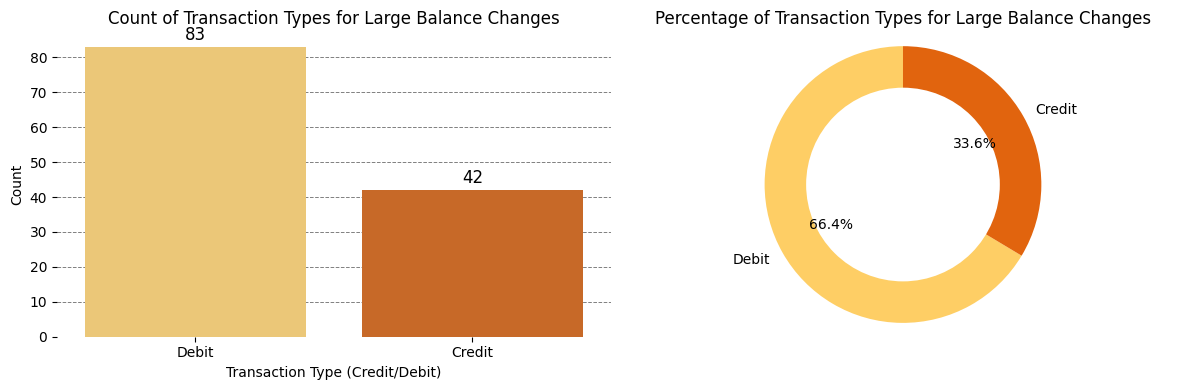

In [34]:
# Group large balance changes by TransactionType and count occurrences
transaction_type_counts = large_balance_changes['TransactionType'].value_counts()
#print("Transaction Type Distribution for Large Balance Changes:\n", transaction_type_counts)

# Calculate percentages
transaction_type_percentages = large_balance_changes['TransactionType'].value_counts(normalize=True) * 100
#print("\nTransaction Type Percentages for Large Balance Changes:\n", transaction_type_percentages)

custom_palette = sns.color_palette("YlOrBr", 2)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x='TransactionType', data=large_balance_changes, ax=axes[0], palette=custom_palette)
axes[0].set_title('Count of Transaction Types for Large Balance Changes')
axes[0].set_xlabel('Transaction Type (Credit/Debit)')
axes[0].set_ylabel('Count')

for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='baseline',
                     color='black', fontsize=12,
                     xytext=(0, 5),
                     textcoords='offset points')

axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)
sns.despine(left=True, bottom=True)

transaction_type_counts = large_balance_changes['TransactionType'].value_counts()
wedges, texts, autotexts = axes[1].pie(
    transaction_type_counts,
    labels=transaction_type_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
axes[1].set_title('Percentage of Transaction Types for Large Balance Changes')
axes[1].axis('equal')
plt.tight_layout()
plt.show()


- The bar chart and pie chart clearly show that debit transactions are significantly more frequent than credit transactions when it comes to large balance changes.
Implications:

- Fraud Risk: The higher proportion of debit transactions associated with large balance changes could potentially indicate a higher risk of fraudulent activity related to debit transactions.

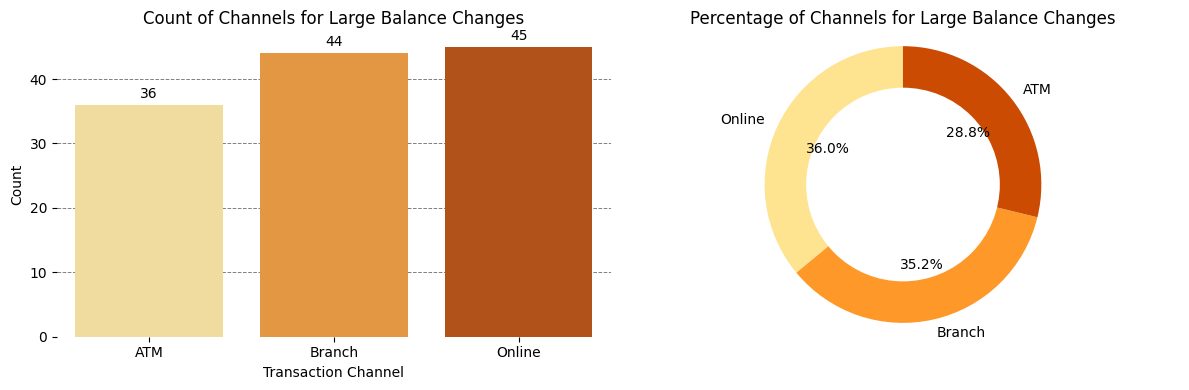

In [35]:
# Group by Channel and count occurrences
channel_counts = large_balance_changes['Channel'].value_counts()
# print("Channel Distribution for Large Balance Changes:\n", channel_counts)

# Calculate percentages
channel_percentages = large_balance_changes['Channel'].value_counts(normalize=True) * 100
# print("\nChannel Percentages for Large Balance Changes:\n", channel_percentages)

custom_palette = sns.color_palette("YlOrBr", len(channel_counts.index))
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x='Channel', data=large_balance_changes, ax=axes[0], palette=custom_palette)
axes[0].set_title('Count of Channels for Large Balance Changes')
axes[0].set_xlabel('Transaction Channel')
axes[0].set_ylabel('Count')

for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='baseline',
                     color='black', fontsize=10,
                     xytext=(0, 5),
                     textcoords='offset points')

axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)
sns.despine(left=True, bottom=True)

wedges, texts, autotexts = axes[1].pie(
    channel_counts,
    labels=channel_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
axes[1].set_title('Percentage of Channels for Large Balance Changes')
axes[1].axis('equal')
plt.tight_layout()
plt.show()

- The bar chart and pie chart clearly show that online transactions are the most frequent channel associated with large balance changes, followed by branch transactions and then ATM transactions.

Implications:

- Online Channel Risk: The higher frequency of online transactions associated with large balance changes could potentially indicate a higher risk of fraudulent activity or unauthorized access through online channels.

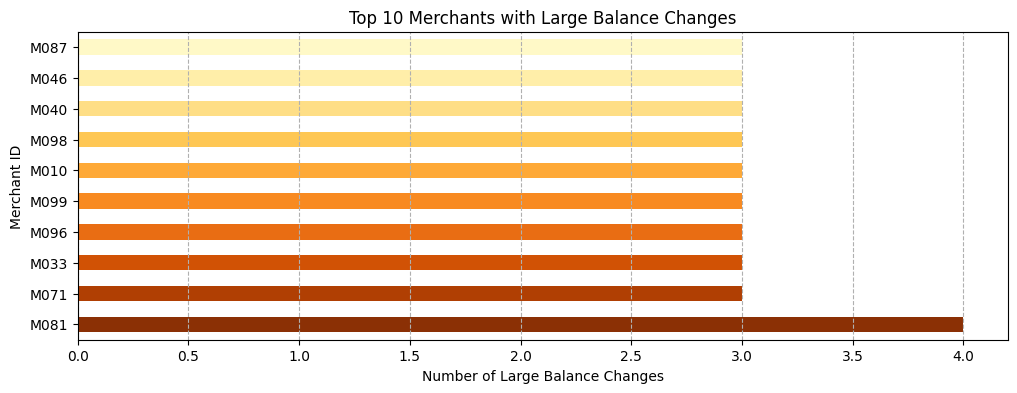

In [36]:
# Merchants
merchant_counts = large_balance_changes['MerchantID'].value_counts().nlargest(10)
# print("Top 10 Merchants with Large Balance Changes:\n", merchant_counts)

plt.figure(figsize=(12, 4))
merchant_counts.plot(kind='barh', color=sns.color_palette("YlOrBr_r", 10))
plt.title('Top 10 Merchants with Large Balance Changes')
plt.xlabel('Number of Large Balance Changes')
plt.ylabel('Merchant ID')
plt.grid(axis='x', linestyle='--')
plt.show()

- Merchant M081 stands out as the merchant with the highest number of large balance changes.
- The other top merchants with a significant number of large balance changes include M054, M010, M087, and M026.
- The top 10 merchants appear to account for a significant portion of the large balance changes, indicating that certain merchants may be more prone to transactions that result in large account balance fluctuations.

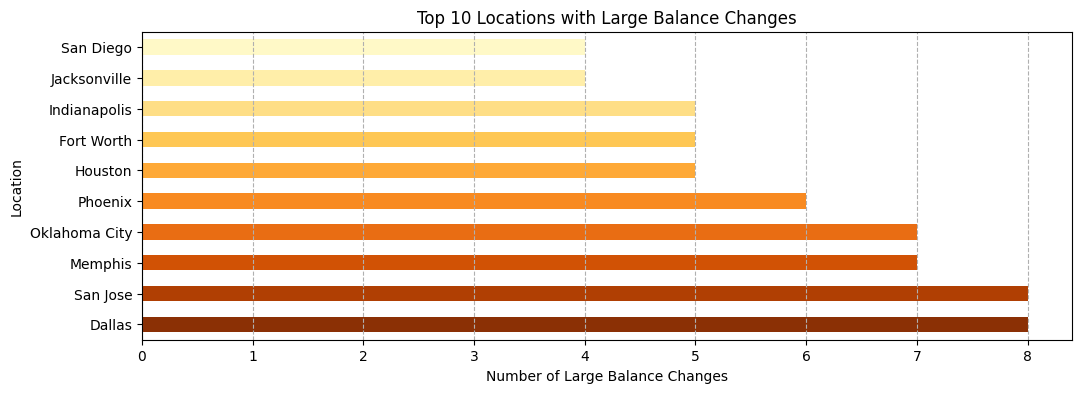

In [37]:
# Locations
location_counts = large_balance_changes['Location'].value_counts().nlargest(10)
# print("\nTop 10 Locations with Large Balance Changes:\n", location_counts)

plt.figure(figsize=(12, 4))
location_counts.plot(kind='barh', color=sns.color_palette("YlOrBr_r", 10))
plt.title('Top 10 Locations with Large Balance Changes')
plt.xlabel('Number of Large Balance Changes')
plt.ylabel('Location')
plt.grid(axis='x', linestyle='--')
plt.show()

- Dallas stands out as the location with the highest number of large balance changes, with 8 instances.

- The other top locations with a significant number of large balance changes include San Jose, Memphis, Oklahoma City, and Phoenix.

- The top 10 locations appear to account for a significant portion of the large balance changes, indicating that certain locations may be more prone to transactions that result in large account balance fluctuations.

In [59]:
# Ensure TransactionDate is in datetime format
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Sort data by AccountID and TransactionDate for accurate time difference calculations
df_sorted = df.sort_values(by=['AccountID', 'TransactionDate'])

# Calculate time difference between consecutive transactions for each account
df_sorted['TimeDifference'] = df_sorted.groupby('AccountID')['TransactionDate'].diff().dt.total_seconds()

# Filter transactions with a time difference of less than 1 hour (3600 seconds)
rapid_transactions = df_sorted[df_sorted['TimeDifference'] <= 3600]

# Display the number of such transactions and a preview of the data
print(f"Number of transactions with time difference of less than 1 hour: {len(rapid_transactions)}")
display(rapid_transactions.head())

Number of transactions with time difference of less than 1 hour: 16


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange,TransactionHour,TransactionDayOfWeek,Day_of_Week,TimeDifference
95,TX000096,AC00010,508.68,2023-06-26 16:16:50,Credit,Mesa,D000622,193.108.17.115,M048,Branch,...,Engineer,127,1,7708.41,2024-11-04 08:09:32,8217.09,16,Monday,Monday,505.0
1258,TX001259,AC00020,603.23,2023-08-24 17:34:13,Debit,Detroit,D000238,38.210.156.148,M017,Branch,...,Student,48,1,117.98,2024-11-04 08:08:18,-485.25,17,Thursday,Thursday,2812.0
2497,TX002498,AC00030,348.17,2023-05-10 17:56:31,Debit,El Paso,D000269,82.51.236.134,M072,ATM,...,Student,181,1,1887.84,2024-11-04 08:11:06,1539.67,17,Wednesday,Wednesday,394.0
496,TX000497,AC00114,286.50,2023-10-23 16:58:04,Credit,Boston,D000602,16.128.130.153,M097,Branch,...,Engineer,60,1,8517.95,2024-11-04 08:09:17,8804.45,16,Monday,Monday,451.0
2341,TX002342,AC00144,97.73,2023-05-29 17:55:23,Debit,Sacramento,D000038,135.29.211.116,M018,Branch,...,Doctor,156,1,7885.21,2024-11-04 08:08:27,7787.48,17,Monday,Monday,2480.0


- The high frequency of transactions with very small time gaps (the leftmost bars) can indicate automated scripts or bot activity often associated with fraud.

- While normal user behavior typically follows a predictable cycle, fraudulent transactions often lack these standard

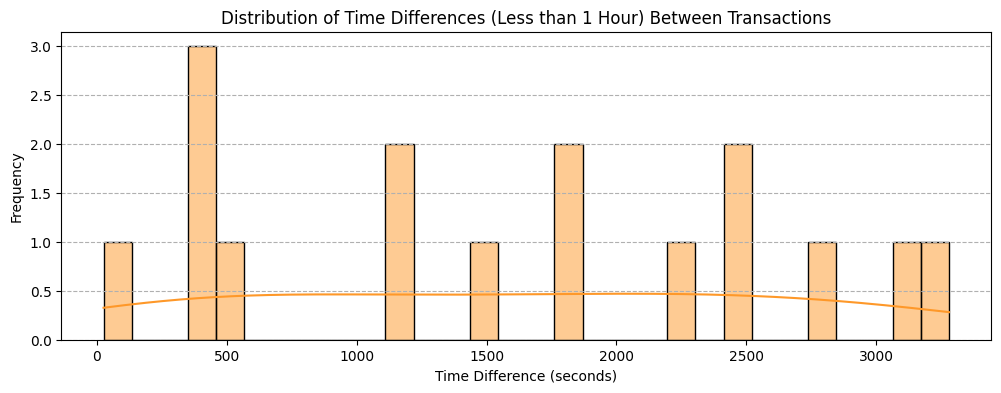

In [60]:
# Visualize the distribution of time differences for these transactions
plt.figure(figsize=(12, 4))
sns.histplot(rapid_transactions['TimeDifference'].dropna(), bins=30, kde=True, color=sns.color_palette("YlOrBr", 1)[0])
plt.title('Distribution of Time Differences (Less than 1 Hour) Between Transactions')
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()

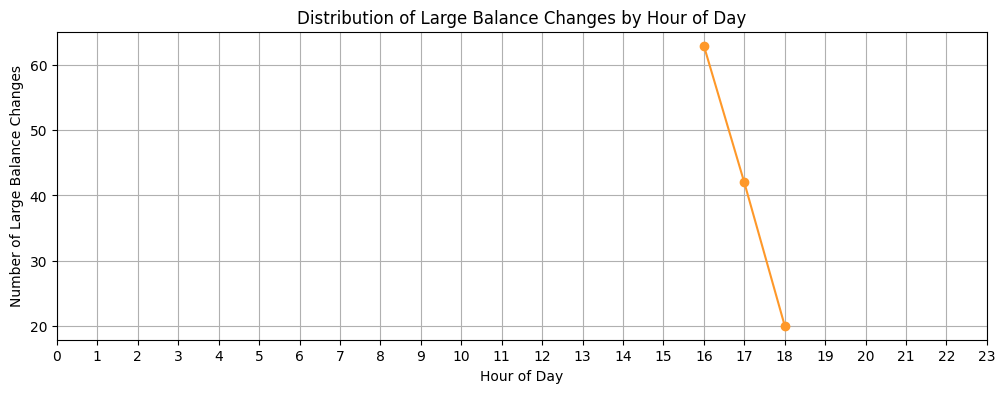

In [38]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Extract hour and day of week
large_balance_changes['TransactionHour'] = large_balance_changes['TransactionDate'].dt.hour
large_balance_changes['TransactionDayOfWeek'] = large_balance_changes['TransactionDate'].dt.day_name()

# Analyze by Hour
hour_counts = large_balance_changes['TransactionHour'].value_counts().sort_index()
# print("Distribution by Hour:\n", hour_counts)

plt.figure(figsize=(12, 4))
plt.plot(hour_counts.index, hour_counts.values, color=sns.color_palette("YlOrBr", 1)[0], marker='o')
plt.title('Distribution of Large Balance Changes by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Large Balance Changes')
plt.xticks(range(24))
plt.grid(True)
plt.show()

- This analysis of for identifying what are thedistribution of large balance changes across the hours of the day? Are there specific times when large balance changes are more frequent?

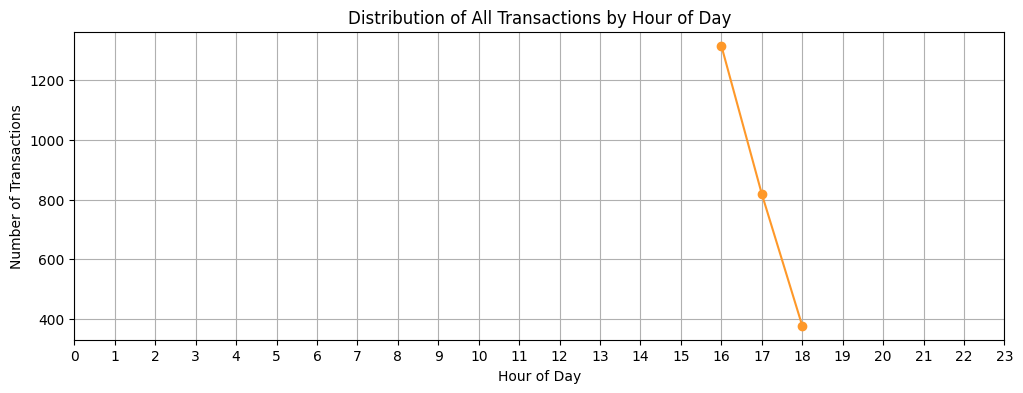

In [39]:
# Ensure TransactionDate is datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Extract hour and day of week for ALL transactions
df['TransactionHour'] = df['TransactionDate'].dt.hour
df['TransactionDayOfWeek'] = df['TransactionDate'].dt.day_name()

# Analyze by Hour (General Transactions)
hour_counts = df['TransactionHour'].value_counts().sort_index()

plt.figure(figsize=(12, 4))
plt.plot(
    hour_counts.index,
    hour_counts.values,
    color=sns.color_palette("YlOrBr", 1)[0],
    marker='o'
)

plt.title('Distribution of All Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(24))
plt.grid(True)
plt.show()


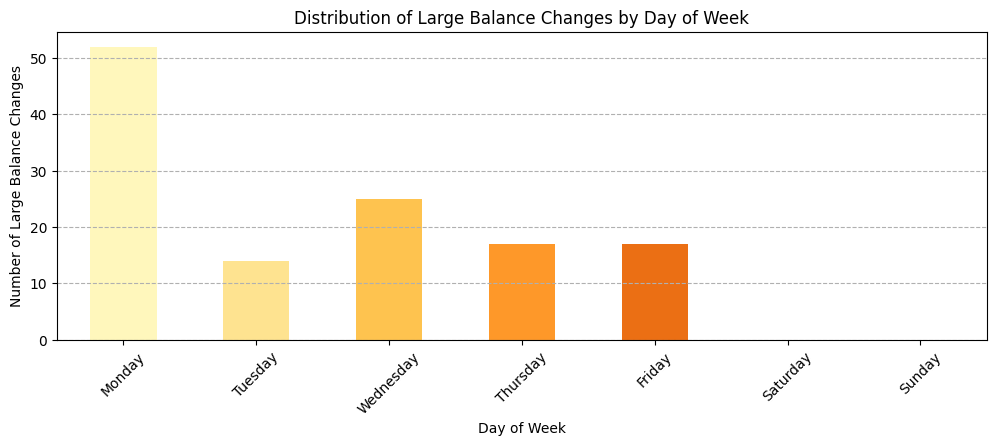

In [40]:
# Analyze by Day of Week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = large_balance_changes['TransactionDayOfWeek'].value_counts().reindex(day_order)
# print("\nDistribution by Day of Week:\n", day_counts)

plt.figure(figsize=(12, 4))
day_counts.plot(kind='bar', color=sns.color_palette("YlOrBr", 7))
plt.title('Distribution of Large Balance Changes by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Large Balance Changes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


- The bar chart clearly shows that Monday has the highest number of large balance changes. This suggests that a significant portion of large account balance fluctuations occur at the beginning of the week.

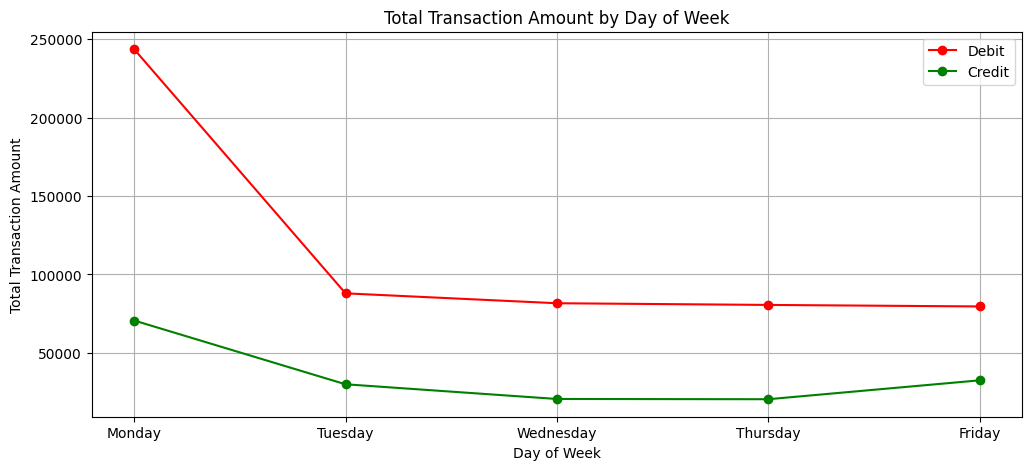

In [41]:
# Ensure TransactionDate is datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Extract day of the week
df['TransactionDayOfWeek'] = df['TransactionDate'].dt.day_name()

# Separate credit and debit transactions
# Assuming 'TransactionType' column exists: 'Credit' or 'Debit'
# and 'TransactionAmount' contains the amount

# Total debit per day
debit_by_day = df[df['TransactionType'] == 'Debit'].groupby('TransactionDayOfWeek')['TransactionAmount'].sum()

# Total credit per day
credit_by_day = df[df['TransactionType'] == 'Credit'].groupby('TransactionDayOfWeek')['TransactionAmount'].sum()

# Optional: order days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
debit_by_day = debit_by_day.reindex(days_order)
credit_by_day = credit_by_day.reindex(days_order)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(debit_by_day.index, debit_by_day.values, marker='o', color='red', label='Debit')
plt.plot(credit_by_day.index, credit_by_day.values, marker='o', color='green', label='Credit')
plt.title('Total Transaction Amount by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Transaction Amount')
plt.legend()
plt.grid(True)
plt.show()


- Debit Analysis reveals unusually tight temporal proximity between transactions. This sudden spike in frequency—occurring faster than humanly possible—suggests a 'salami-slicing' or account takeover pattern aimed at bypassing standard spending limits.

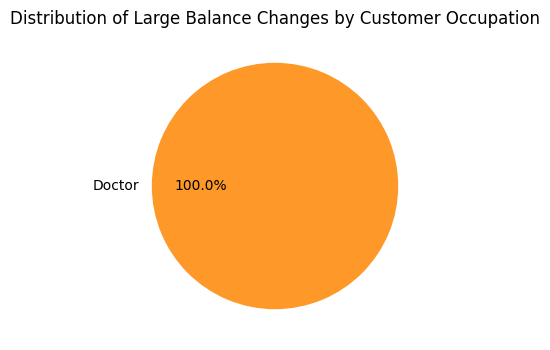

In [42]:
# Group by CustomerOccupation and count occurrences
occupation_counts = large_balance_changes['CustomerOccupation'].value_counts()
# print("Occupation Distribution for Large Balance Changes:\n", occupation_counts)

# Calculate percentages
occupation_percentages = large_balance_changes['CustomerOccupation'].value_counts(normalize=True) * 100
# print("\nOccupation Percentages for Large Balance Changes:\n", occupation_percentages)

num_occupations = len(occupation_counts)
plt.figure(figsize=(4,4))
if num_occupations <= 10:
    occupation_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('YlOrBr', num_occupations))
    plt.ylabel('')
else:
    occupation_counts.plot(kind='bar', color=sns.color_palette('YlOrBr', num_occupations))
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--')
    plt.ylabel('Number of Large Balance Changes')


plt.title('Distribution of Large Balance Changes by Customer Occupation')
plt.show()

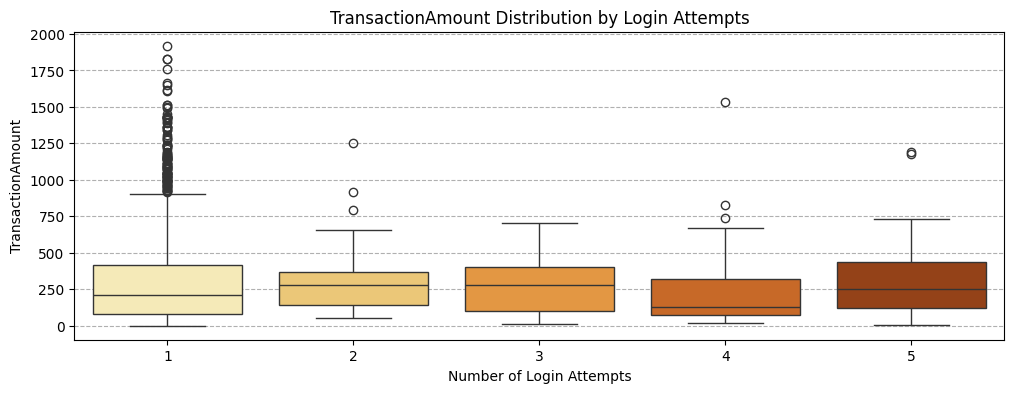

In [43]:
# Relationship between Login Attempts and TransactionAmount
plt.figure(figsize=(12, 4))
sns.boxplot(x='LoginAttempts', y='TransactionAmount', data=df, palette='YlOrBr')
plt.title('TransactionAmount Distribution by Login Attempts')
plt.xlabel('Number of Login Attempts')
plt.ylabel('TransactionAmount')
plt.grid(axis='y', linestyle='--')
plt.show()


- The "dots" above the whiskers are outliers. In fraud detection, these high-value transactions—especially after few login attempts—are critical data points that may indicate account takeover or "smash and grab" fraud.

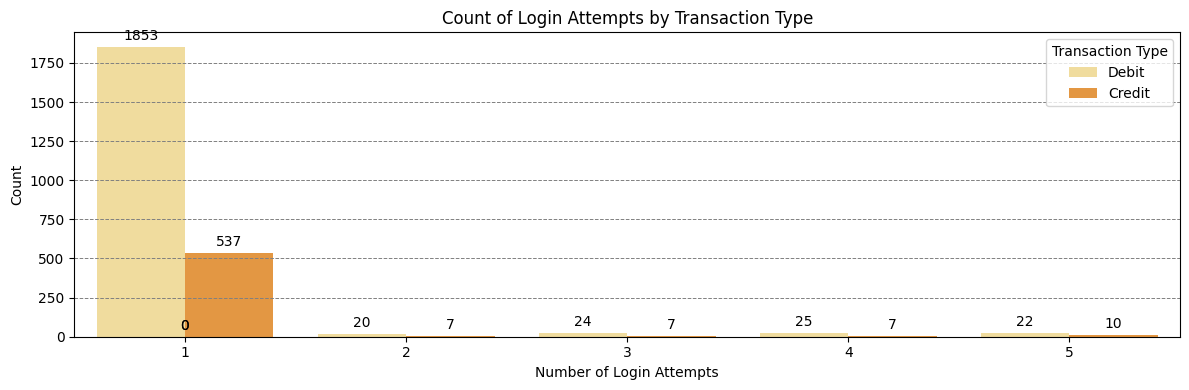

In [44]:
# Create a count plot of Login Attempts by TransactionType
custom_palette = sns.color_palette("YlOrBr", 3)
plt.figure(figsize=(12, 4))
sns.countplot(x='LoginAttempts', hue='TransactionType', data=df, palette=custom_palette)
plt.title('Count of Login Attempts by Transaction Type')
plt.xlabel('Number of Login Attempts')
plt.ylabel('Count')
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.7)
plt.legend(title='Transaction Type')

for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='baseline',
                 color='black', fontsize=10,
                 xytext=(0, 5),
                 textcoords='offset points')

plt.tight_layout()
plt.show()

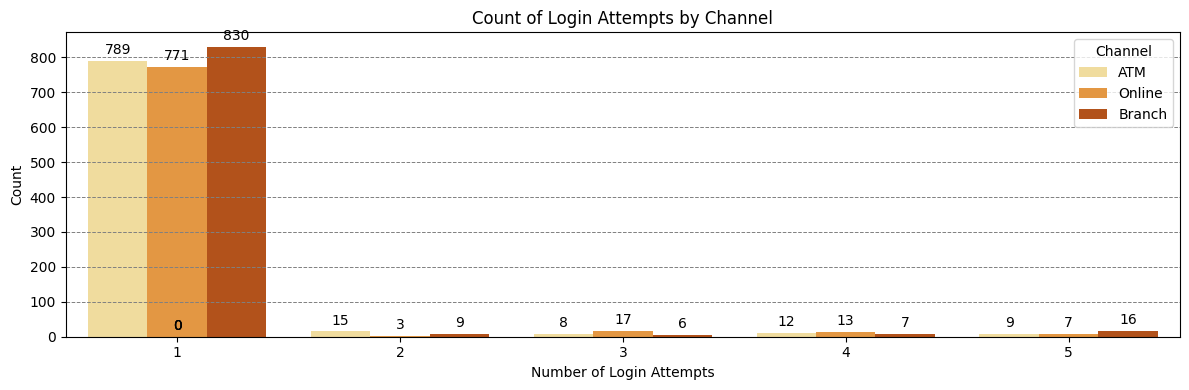

In [45]:
# Create a count plot of Login Attempts by Channel
custom_palette = sns.color_palette("YlOrBr", 3)
plt.figure(figsize=(12, 4))
sns.countplot(x='LoginAttempts', hue='Channel', data=df, palette=custom_palette)
plt.title('Count of Login Attempts by Channel')
plt.xlabel('Number of Login Attempts')
plt.ylabel('Count')
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.7)
plt.legend(title='Channel')

for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='baseline',
                 color='black', fontsize=10,
                 xytext=(0, 5),
                 textcoords='offset points')

plt.tight_layout()
plt.show()


In [46]:
# Transactions with more than onelogin attempt
high_login_attempts = df[df['LoginAttempts'] > 1]
print(f"Number of transactions with more than one login attempt: {len(high_login_attempts)}")
display(high_login_attempts.head())

Number of transactions with more than one login attempt: 122


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange,TransactionHour,TransactionDayOfWeek
23,TX000024,AC00453,345.84,2023-05-02 18:25:46,Debit,Fort Worth,D000162,191.82.103.198,M083,Online,22,Student,142,3,1402.50,2024-11-04 08:07:04,1056.66,18,Tuesday
26,TX000027,AC00441,246.93,2023-04-17 16:37:01,Debit,Miami,D000046,55.154.161.250,M029,ATM,23,Student,158,5,673.35,2024-11-04 08:11:38,426.42,16,Monday
32,TX000033,AC00060,396.45,2023-09-25 16:26:00,Debit,New York,D000621,133.67.250.163,M007,ATM,49,Engineer,168,3,9690.15,2024-11-04 08:11:13,9293.70,16,Monday
38,TX000039,AC00478,795.31,2023-10-12 17:07:40,Debit,Mesa,D000077,49.29.37.185,M048,ATM,66,Doctor,90,2,7914.88,2024-11-04 08:11:17,7119.57,17,Thursday
61,TX000062,AC00002,263.99,2023-05-16 16:07:30,Debit,Dallas,D000285,7.146.35.122,M087,Branch,79,Retired,227,2,4175.02,2024-11-04 08:11:03,3911.03,16,Tuesday


- For transactions with more than one login attempt,¶

- what is the distribution of transaction types (credit vs. debit)?

- what is the distribution of transaction channels?

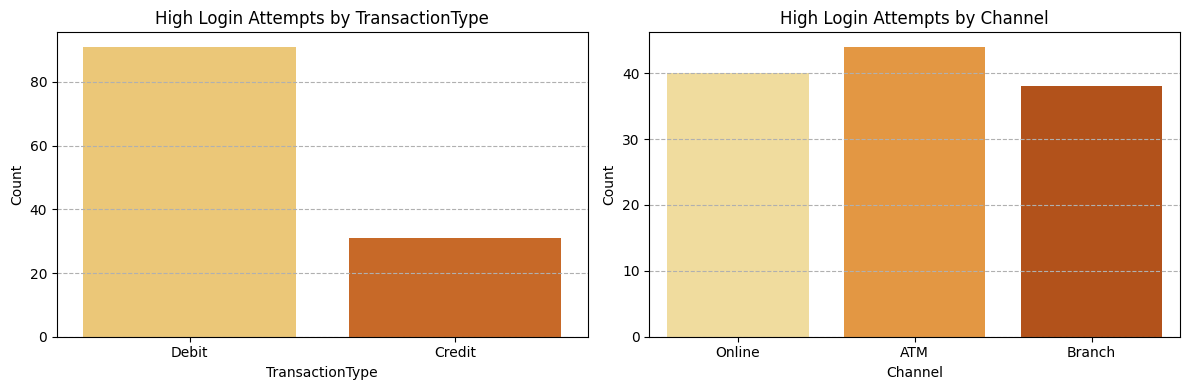

In [47]:
# Analyzing high login attempts with respect to TransactionType and Channel
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(data=high_login_attempts, x='TransactionType', palette=sns.color_palette("YlOrBr", 2))
plt.title('High Login Attempts by TransactionType')
plt.xlabel('TransactionType')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--')

plt.subplot(1, 2, 2)
sns.countplot(data=high_login_attempts, x='Channel', palette=sns.color_palette("YlOrBr", len(high_login_attempts['Channel'].unique())))
plt.title('High Login Attempts by Channel')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()


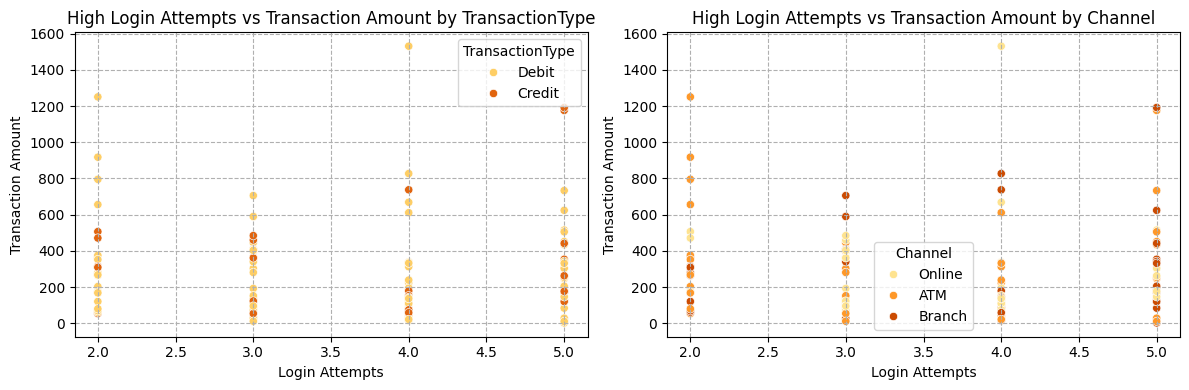

In [48]:
# Transactions with more than one login attempt
high_login_attempts = df[df['LoginAttempts'] > 1]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(data=high_login_attempts, x='LoginAttempts', y='TransactionAmount', hue='TransactionType', palette="YlOrBr", ax=axes[0])
axes[0].set_title('High Login Attempts vs Transaction Amount by TransactionType')
axes[0].set_xlabel('Login Attempts')
axes[0].set_ylabel('Transaction Amount')
axes[0].grid(True, linestyle='--')

sns.scatterplot(data=high_login_attempts, x='LoginAttempts', y='TransactionAmount', hue='Channel', palette="YlOrBr", ax=axes[1])
axes[1].set_title('High Login Attempts vs Transaction Amount by Channel')
axes[1].set_xlabel('Login Attempts')
axes[1].set_ylabel('Transaction Amount')
axes[1].grid(True, linestyle='--')

plt.tight_layout()
plt.show()

- This analysis can help uncover potential patterns, such as whether certain transaction channels or types are more prone to multiple login attempts, which may raise security concerns.  

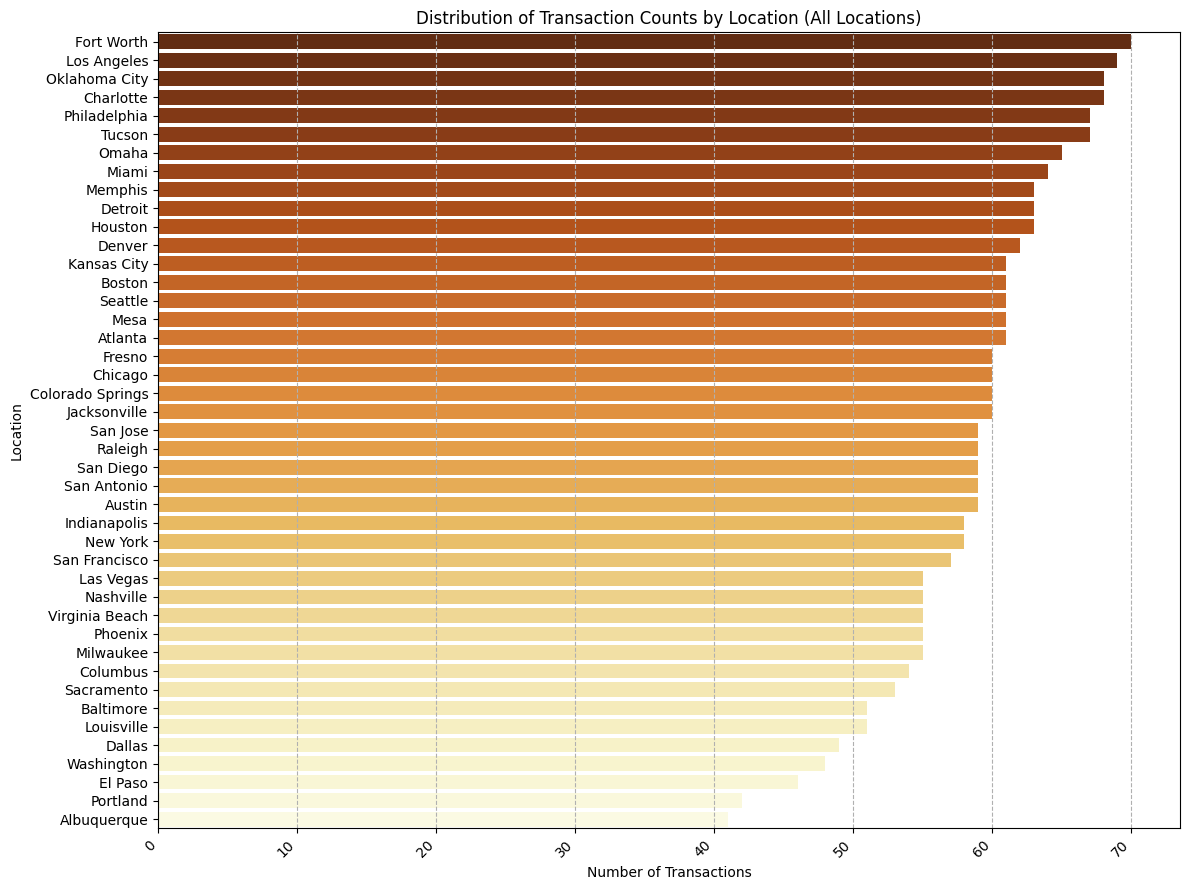

In [49]:
# Distribution of Transactions by Location (All Locations)
plt.figure(figsize=(12, 9))
location_counts = df['Location'].value_counts()
sns.barplot(x=location_counts.values, y=location_counts.index, palette='YlOrBr_r')
plt.title('Distribution of Transaction Counts by Location (All Locations)')
plt.xlabel('Number of Transactions')
plt.ylabel('Location')
plt.grid(axis='x', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- Lets see the analysis of transactions in locations

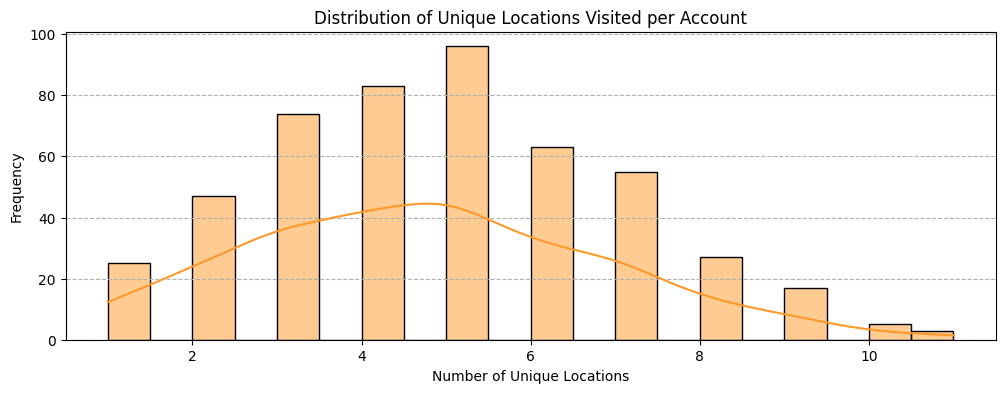

In [50]:
# Count unique locations per AccountID
location_counts_per_account = df.groupby('AccountID')['Location'].nunique().reset_index()
location_counts_per_account.columns = ['AccountID', 'UniqueLocations']

plt.figure(figsize=(12, 4))
sns.histplot(location_counts_per_account['UniqueLocations'], bins=20, kde=True, color=sns.color_palette("YlOrBr", 1)[0]) #Updated code
plt.title('Distribution of Unique Locations Visited per Account')
plt.xlabel('Number of Unique Locations')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()

- The histogram shows that most accounts transact in one to three unique locations, with a sharp decline as location variety increases. This distribution identifies common behavior; accounts transacting in over five locations are outliers and may warrant further investigation for potential fraudulent activity.

In [51]:
# Merge unique location counts back to the original DataFrame
location_counts = df.groupby('AccountID')['Location'].nunique().reset_index().rename(columns={'Location': 'UniqueLocations'})
uncommon_location_transactions = df.merge(location_counts, on='AccountID')
# Filter for accounts with more than 3 unique locations
uncommon_location_transactions = uncommon_location_transactions[uncommon_location_transactions['UniqueLocations'] > 3]
# Display results for accounts with transactions from multiple locations
print(f"\nNumber of accounts with transactions from multiple locations: {len(uncommon_location_transactions['AccountID'].unique())}")
display(uncommon_location_transactions.head())


Number of accounts with transactions from multiple locations: 349


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange,TransactionHour,TransactionDayOfWeek,UniqueLocations
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,5098.12,16,Tuesday,7
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,13382.67,16,Tuesday,7
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,996.06,18,Monday,4
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,8384.56,16,Friday,7
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,7442.85,17,Monday,6


In [52]:
# Identifying Accounts with Significant Location Shifts (duplicate logic removed)
print(f"\nIdentifying Accounts with Significant Location Shifts:")
significant_location_shifts = location_counts[location_counts['UniqueLocations'] > 4]
display(significant_location_shifts.head(10))


Identifying Accounts with Significant Location Shifts:


,AccountID,UniqueLocations
1,AC00002,7
2,AC00003,5
3,AC00004,9
4,AC00005,9
6,AC00007,5
8,AC00009,5
9,AC00010,7
10,AC00011,5
11,AC00012,6
12,AC00013,7


This approach can help identify accounts exhibiting rapid or unusual location changes, which may indicate fraud, automated activity, or compromised accounts.

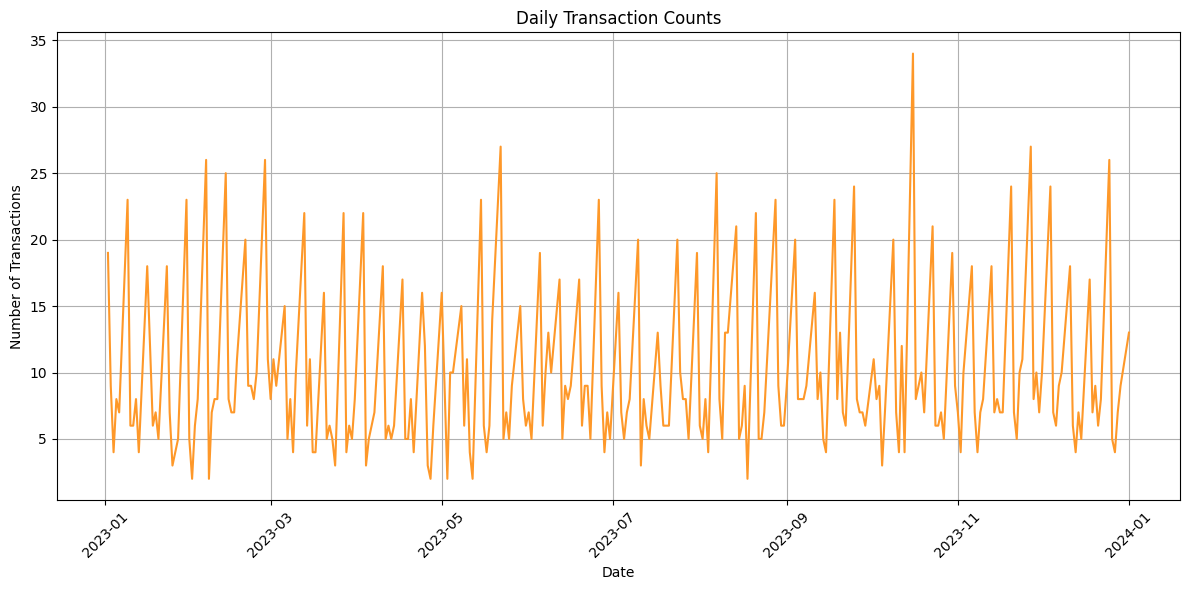

In [53]:
# Ensure TransactionDate is in datetime format
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')

# Group by date and count transactions
daily_transactions = df.groupby(df['TransactionDate'].dt.date).size().reset_index(name='TransactionCount')
daily_transactions['TransactionDate'] = pd.to_datetime(daily_transactions['TransactionDate'])

plt.figure(figsize=(12, 6))
sns.lineplot(x='TransactionDate', y='TransactionCount', data=daily_transactions, color=sns.color_palette("YlOrBr", 1)[0])
plt.title('Daily Transaction Counts')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

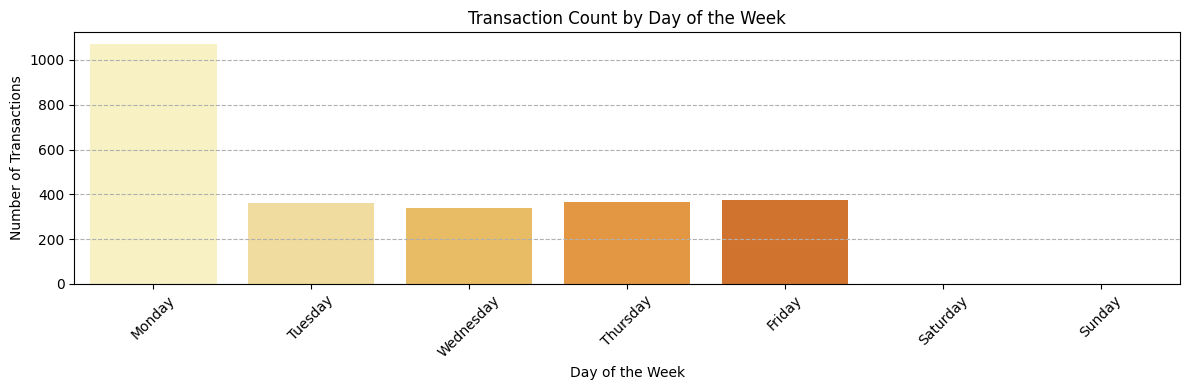

In [54]:
# Extract the day of the week
df['Day_of_Week'] = df['TransactionDate'].dt.day_name()

# Group by day of the week and count transactions
weekday_counts = df['Day_of_Week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(12, 4))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette='YlOrBr')
plt.title('Transaction Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


- Finding out if theres is a difference in transaction between weekdays and weekend

In [55]:
df['TransactionHour'] = df['TransactionDate'].dt.hour

# Define unusual hours (outside 9 AM - 6 PM)
unusual_hours = list(range(0, 9)) + list(range(18, 24))

# Filter transactions during unusual hours
unusual_hour_transactions = df[df['TransactionHour'].isin(unusual_hours)]

print(f"Number of transactions during unusual hours: {len(unusual_hour_transactions)}")
display(unusual_hour_transactions.head())

Number of transactions during unusual hours: 377


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange,TransactionHour,TransactionDayOfWeek,Day_of_Week
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,996.06,18,Monday,Monday
17,TX000018,AC00359,492.93,2023-12-14 18:32:14,Debit,Columbus,D000432,114.223.129.47,M059,Online,39,Engineer,234,1,5109.97,2024-11-04 08:11:51,4617.04,18,Thursday,Thursday
19,TX000020,AC00285,71.48,2023-06-08 18:18:50,Credit,Columbus,D000039,120.170.93.69,M039,Online,18,Student,169,1,6568.59,2024-11-04 08:09:20,6640.07,18,Thursday,Thursday
21,TX000022,AC00014,85.77,2023-08-11 18:31:31,Debit,Las Vegas,D000268,59.132.247.252,M065,Branch,38,Doctor,93,1,9146.19,2024-11-04 08:08:13,9060.42,18,Friday,Friday
22,TX000023,AC00095,52.20,2023-06-06 18:54:15,Debit,Atlanta,D000142,133.63.96.21,M022,Online,39,Engineer,120,1,8974.93,2024-11-04 08:07:01,8922.73,18,Tuesday,Tuesday


- Number of transaction during unusual hours

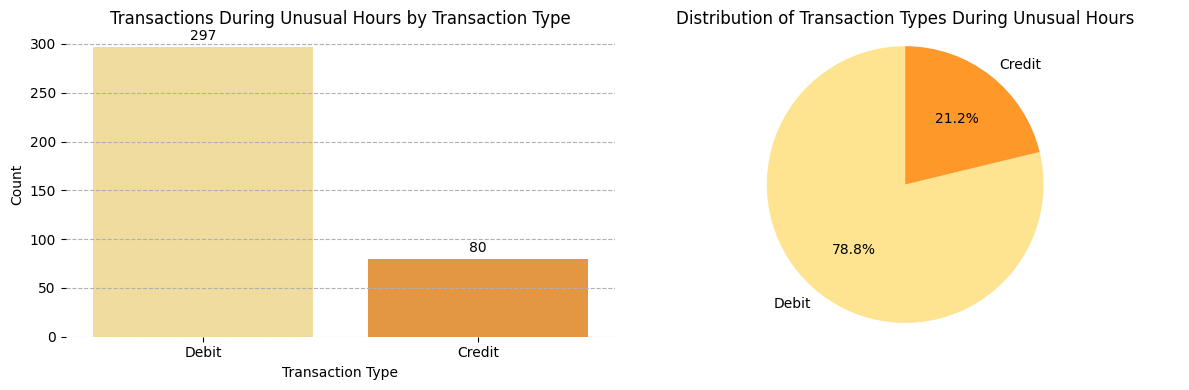

In [56]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

ax1 = sns.countplot(data=unusual_hour_transactions, x='TransactionType', palette=custom_palette, ax=axes[0])
axes[0].set_title('Transactions During Unusual Hours by Transaction Type')
axes[0].set_xlabel('Transaction Type')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', linestyle='--')

for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='baseline',
                 color='black', fontsize=10,
                 xytext=(0, 5), textcoords='offset points')
sns.despine(left=True, bottom=True)

transaction_counts = unusual_hour_transactions['TransactionType'].value_counts()
axes[1].pie(transaction_counts, labels=transaction_counts.index, autopct='%1.1f%%', startangle=90, colors=custom_palette)
axes[1].set_title('Distribution of Transaction Types During Unusual Hours')
axes[1].axis('equal')

plt.tight_layout()
plt.show()

- During the unusual hour most people spend compared to how they receive and this my indicate an anomaly

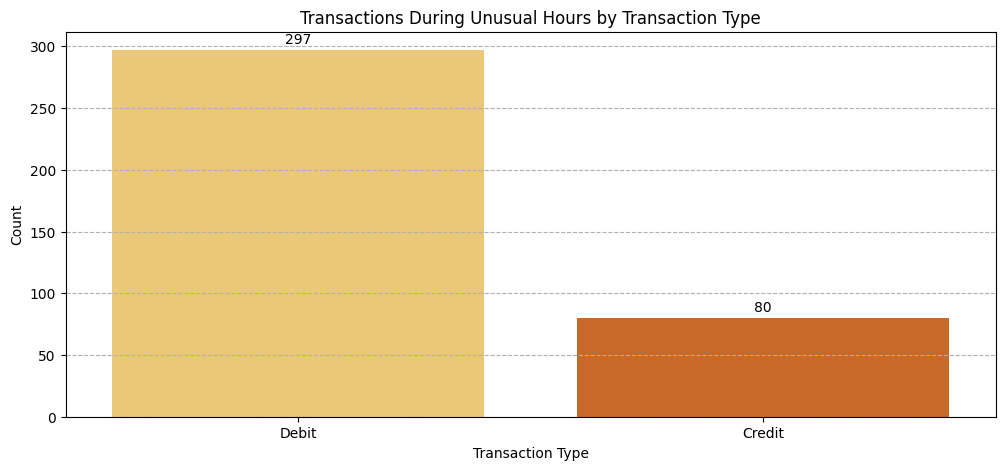

In [57]:
# Visualize transactions during unusual hours by type
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=unusual_hour_transactions, x='TransactionType', palette='YlOrBr')
plt.title('Transactions During Unusual Hours by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                color='black', fontsize=10,
                xytext=(0, 5), textcoords='offset points')

plt.show()


In [61]:
# Group by AccountID to count unique locations
location_pattern = df.groupby('AccountID')['Location'].nunique().reset_index().rename(columns={'Location': 'UniqueLocationsCount'})
# Merge and identify accounts with high variability in transaction locations
df = df.merge(location_pattern, on='AccountID')
high_location_variability = df[df['UniqueLocationsCount'] > 5]
print(f"Number of accounts with high location variability: {len(high_location_variability)}")
display(high_location_variability.head())

Number of accounts with high location variability: 1282


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange,TransactionHour,TransactionDayOfWeek,Day_of_Week,UniqueLocationsCount
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,...,Doctor,81,1,5112.21,2024-11-04 08:08:08,5098.12,16,Tuesday,Tuesday,7
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,...,Doctor,141,1,13758.91,2024-11-04 08:09:35,13382.67,16,Tuesday,Tuesday,7
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,...,Student,25,1,8569.06,2024-11-04 08:09:06,8384.56,16,Friday,Friday,7
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,...,Student,198,1,7429.40,2024-11-04 08:06:39,7442.85,17,Monday,Monday,6
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,...,Student,172,1,781.68,2024-11-04 08:06:36,689.53,17,Monday,Monday,7


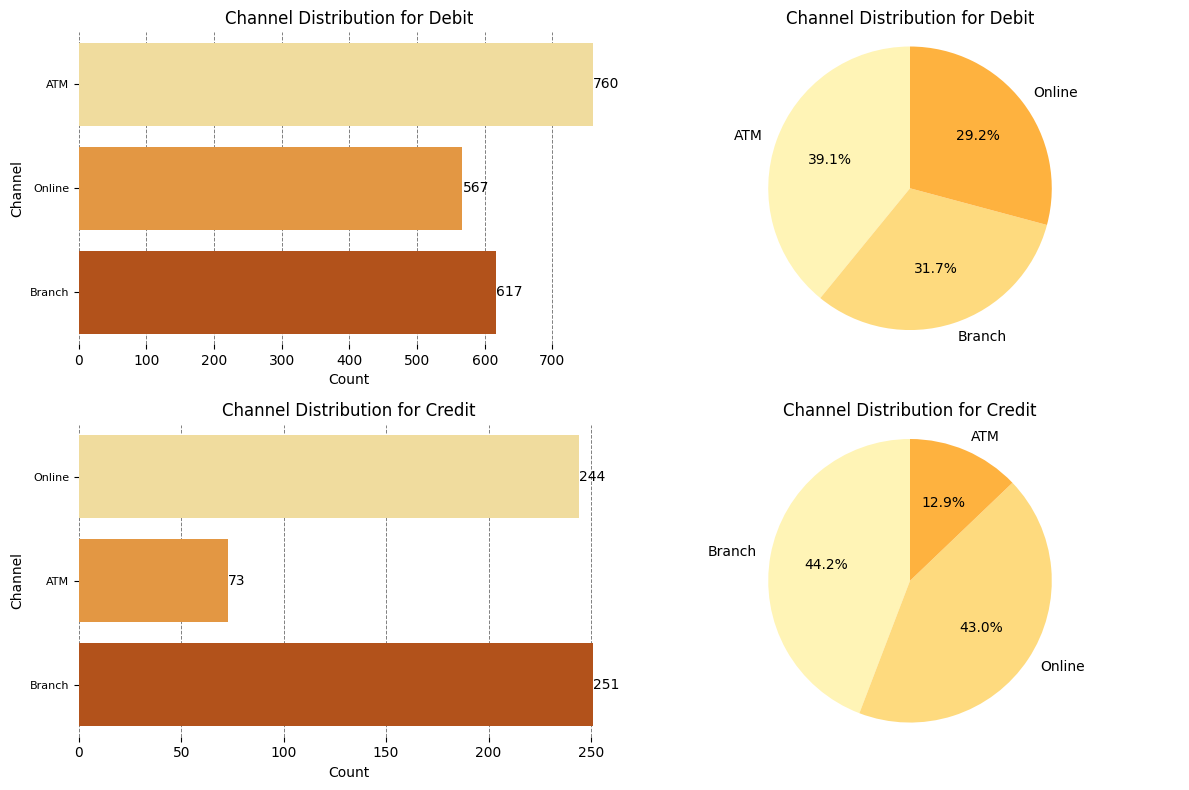

In [62]:
def plot_channel_transaction_visualization(ax, df, transaction_type):
    filtered_data = df[df['TransactionType'] == transaction_type]

    # Count Plot
    sns.countplot(y='Channel', data=filtered_data, ax=ax[0], palette='YlOrBr')
    ax[0].set_title(f'Channel Distribution for {transaction_type}')
    ax[0].set_xlabel('Count')
    ax[0].set_ylabel('Channel')
    ax[0].tick_params(axis='y', labelsize=8)

    for p in ax[0].patches:
        ax[0].annotate(f'{int(p.get_width())}',
                        (p.get_width(), p.get_y() + p.get_height() / 2),
                        ha='left', va='center',
                        color='black', fontsize=10)

    ax[0].set_axisbelow(True)
    ax[0].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)
    sns.despine(left=True, bottom=True)

    # Pie Chart
    channel_counts = filtered_data['Channel'].value_counts()
    ax[1].pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('YlOrBr'))
    ax[1].set_title(f'Channel Distribution for {transaction_type}')
    ax[1].axis('equal')

unique_transaction_types = df['TransactionType'].unique()
num_transaction_types = len(unique_transaction_types)

fig, axes = plt.subplots(num_transaction_types, 2, figsize=(12, 4 * num_transaction_types))

for i, transaction_type in enumerate(unique_transaction_types):
    plot_channel_transaction_visualization(axes[i], df, transaction_type)

plt.tight_layout()
plt.show()

In [63]:
# Calculate merchant statistics
merchant_stats = df.groupby('MerchantID')['TransactionAmount'].agg(
    TotalTransactions='count',
    AverageTransactionAmount='mean',
    MaxTransactionAmount='max',
    StdTransactionAmount='std'
).reset_index()

# Define criteria for outliers
overall_std = df['TransactionAmount'].std()
overall_mean = df['TransactionAmount'].mean()

high_std_merchants = merchant_stats[merchant_stats['StdTransactionAmount'] > overall_std]
high_value_merchants = merchant_stats[merchant_stats['MaxTransactionAmount'] > (overall_mean * 3)]
high_transaction_count_merchants = merchant_stats[merchant_stats['TotalTransactions'] > merchant_stats['TotalTransactions'].quantile(0.95)]

# Combine criteria
outlier_merchants = pd.concat([high_std_merchants, high_value_merchants, high_transaction_count_merchants]).drop_duplicates()

# Visualize and analyze
print(f"Number of identified outlier merchants: {len(outlier_merchants)}")
display(outlier_merchants)

Number of identified outlier merchants: 66


,MerchantID,TotalTransactions,AverageTransactionAmount,MaxTransactionAmount,StdTransactionAmount
3,M004,31,265.268387,1309.79,348.948133
4,M005,32,346.872813,1168.26,314.297555
5,M006,16,383.873125,1154.79,309.952846
8,M009,30,350.868000,1162.42,346.133895
11,M012,21,409.340952,1831.02,453.717576
...,...,...,...,...,...
67,M068,32,302.502187,1192.95,249.361991
86,M087,25,227.976400,1020.73,264.217926
87,M088,30,300.054333,1454.52,276.328185
89,M090,24,175.532500,1076.98,241.480707


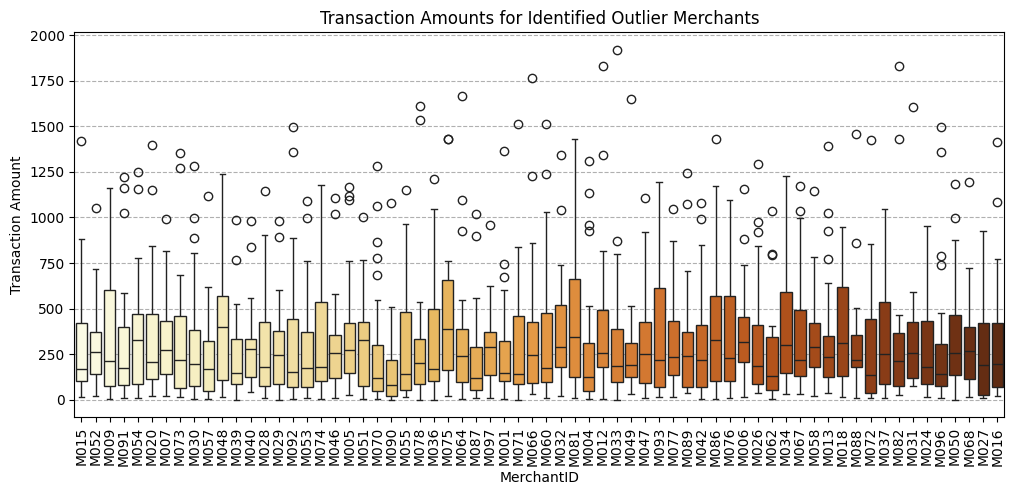

In [64]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[df['MerchantID'].isin(outlier_merchants['MerchantID'])], x='MerchantID', y='TransactionAmount', palette='YlOrBr')
plt.xticks(rotation=90)
plt.title('Transaction Amounts for Identified Outlier Merchants')
plt.xlabel('MerchantID')
plt.ylabel('Transaction Amount')
plt.grid(axis='y', linestyle='--')
plt.show()

- This analysis identifies significant transaction anomalies across outlier merchants. While the majority of transactions fall within expected ranges, the frequent high-value data points (outliers) signal suspicious activities that warrant further investigation to mitigate potential financial fraud.

In [66]:
# Multiple Accounts Using the Same Device
# Count unique accounts per DeviceID
device_account_counts = df.groupby('DeviceID')['AccountID'].nunique().reset_index().rename(columns={'AccountID': 'UniqueAccounts'})
# Identify devices associated with more than one account
suspicious_devices = device_account_counts[device_account_counts['UniqueAccounts'] > 1]
print(f"Number of devices used for multiple accounts: {len(suspicious_devices)}")
display(suspicious_devices)

Number of devices used for multiple accounts: 609


,DeviceID,UniqueAccounts
0,D000001,4
1,D000002,5
2,D000003,2
3,D000004,4
4,D000005,6
...,...,...
676,D000696,2
677,D000697,9
678,D000698,3
679,D000699,2


- Based on the displayed data, 609 unique devices are linked to multiple accounts, signaling potential sybil attacks or account farming. For instance, device D000002 alone manages 5 separate accounts, highlighting high-risk entities that require immediate investigative priority.

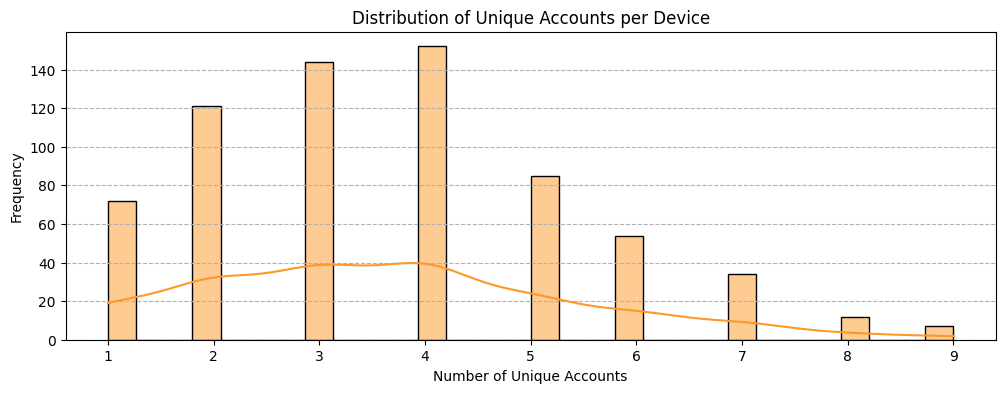

In [67]:
# Visualize the distribution
plt.figure(figsize=(12, 4))
sns.histplot(device_account_counts['UniqueAccounts'], bins=30, kde=True, color=sns.color_palette("YlOrBr", 1)[0])
plt.title('Distribution of Unique Accounts per Device')
plt.xlabel('Number of Unique Accounts')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()

In [68]:
# Multiple Accounts Using the Same IP Address
ip_counts = df.groupby('IP Address')['AccountID'].nunique().reset_index()
ip_counts.columns = ['IP Address', 'UniqueAccounts']
shared_ips = ip_counts[ip_counts['UniqueAccounts'] > 1]
print(f"Number of IP addresses used by multiple accounts: {len(shared_ips)}")
display(shared_ips.head())


Number of IP addresses used by multiple accounts: 552


,IP Address,UniqueAccounts
0,1.198.76.182,8
1,1.238.163.61,3
2,1.7.29.72,2
3,1.98.25.114,3
4,10.144.131.89,3


- The UniqueAccounts column shows that while a count of 2 or 3 is common, higher frequencies like 8 are high-risk anomalies.

- Actionable insight: This clustering suggests either coordinated fraudulent activity or legitimate shared environments (like offices or public Wi-Fi) that require secondary verification.

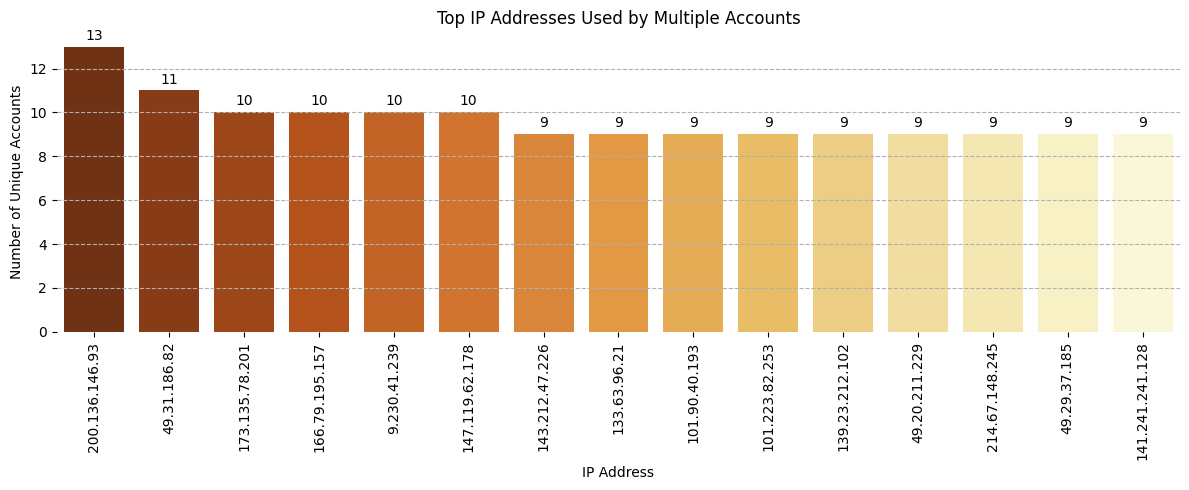

In [69]:
# Top IP addresses used by multiple accounts
plt.figure(figsize=(12, 5))
top_shared_ips = shared_ips.sort_values(by='UniqueAccounts', ascending=False).head(15)

ax = sns.barplot(x=top_shared_ips['IP Address'], y=top_shared_ips['UniqueAccounts'], palette='YlOrBr_r')
plt.title('Top IP Addresses Used by Multiple Accounts')
plt.xlabel('IP Address')
plt.ylabel('Number of Unique Accounts')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                color='black', fontsize=10,
                xytext=(0, 5), textcoords='offset points')

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

In [70]:
# Frequent IP Changes for a Single Account
# Group by AccountID to count unique IP Addresses
ip_variability = df.groupby('AccountID')['IP Address'].nunique().reset_index().rename(columns={'IP Address': 'UniqueIPAddresses'})
# Identify accounts with a high number of unique IP Addresses
high_ip_variability_accounts = ip_variability[ip_variability['UniqueIPAddresses'] > 3]  # Example threshold
print(f"Number of accounts with high IP variability: {len(high_ip_variability_accounts)}")
display(high_ip_variability_accounts)

Number of accounts with high IP variability: 366


,AccountID,UniqueIPAddresses
1,AC00002,7
2,AC00003,5
3,AC00004,9
4,AC00005,9
5,AC00006,4
...,...,...
489,AC00495,8
491,AC00497,6
492,AC00498,8
493,AC00499,7


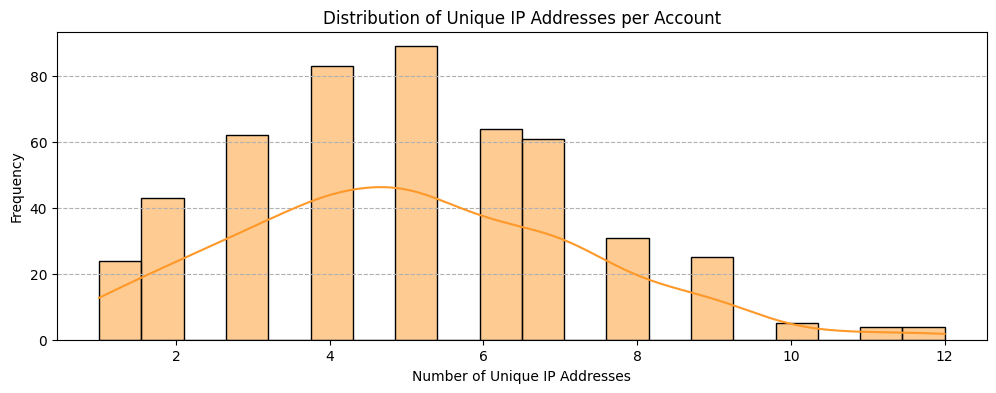

In [71]:
# Plot distribution of unique IP addresses per account
plt.figure(figsize=(12, 4))
sns.histplot(ip_variability['UniqueIPAddresses'], bins=20, kde=True, color=sns.color_palette("YlOrBr", 1)[0])
plt.title('Distribution of Unique IP Addresses per Account')
plt.xlabel('Number of Unique IP Addresses')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()


In [72]:
# Calculate summary statistics for TransactionDuration
duration_mean = df['TransactionDuration'].mean()
duration_std = df['TransactionDuration'].std()
long_duration_threshold = duration_mean + 2 * duration_std

# Identify long-duration transactions
long_duration_transactions = df[df['TransactionDuration'] > long_duration_threshold]
print(f"Number of long-duration transactions (above {long_duration_threshold} seconds): {len(long_duration_transactions)}")
display(long_duration_transactions.head())

Number of long-duration transactions (above 259.5708259512189 seconds): 142


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange,TransactionHour,TransactionDayOfWeek,Day_of_Week,UniqueLocationsCount
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,...,Retired,291,1,2796.24,2024-11-04 08:10:55,2967.66,17,Monday,Monday,6
25,TX000026,AC00041,7.49,2023-10-20 17:53:13,Credit,Houston,D000671,81.248.235.147,M043,Online,...,Retired,276,1,3634.67,2024-11-04 08:09:44,3642.16,17,Friday,Friday,7
29,TX000030,AC00313,56.17,2023-09-20 16:55:42,Debit,Detroit,D000297,33.28.138.82,M043,Branch,...,Student,283,1,1351.69,2024-11-04 08:08:30,1295.52,16,Wednesday,Wednesday,3
51,TX000052,AC00482,424.56,2023-02-21 17:45:55,Debit,Omaha,D000598,179.43.245.131,M015,Online,...,Engineer,264,1,5183.85,2024-11-04 08:09:02,4759.29,17,Tuesday,Tuesday,5
73,TX000074,AC00110,233.92,2023-10-20 16:54:28,Credit,Jacksonville,D000295,152.140.239.181,M046,Online,...,Student,280,1,6537.62,2024-11-04 08:08:45,6771.54,16,Friday,Friday,8


- Our analysis identified 142 long-duration transactions exceeding a threshold of approximately 259.58 seconds. These outliers, representing significant deviations from the mean duration, were isolated for further investigation into potential anomalies and suspicious activities within the dataset."

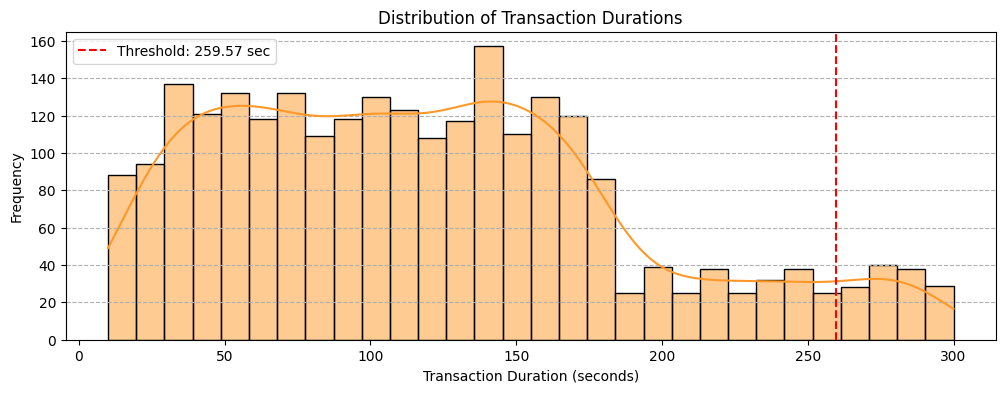

In [73]:
# Visualize distribution of TransactionDuration
plt.figure(figsize=(12, 4))
sns.histplot(df['TransactionDuration'], bins=30, kde=True, color=sns.color_palette("YlOrBr", 1)[0])  # Color Palette
plt.axvline(long_duration_threshold, color='red', linestyle='--', label=f'Threshold: {long_duration_threshold:.2f} sec')
plt.title('Distribution of Transaction Durations')
plt.xlabel('Transaction Duration (seconds)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()

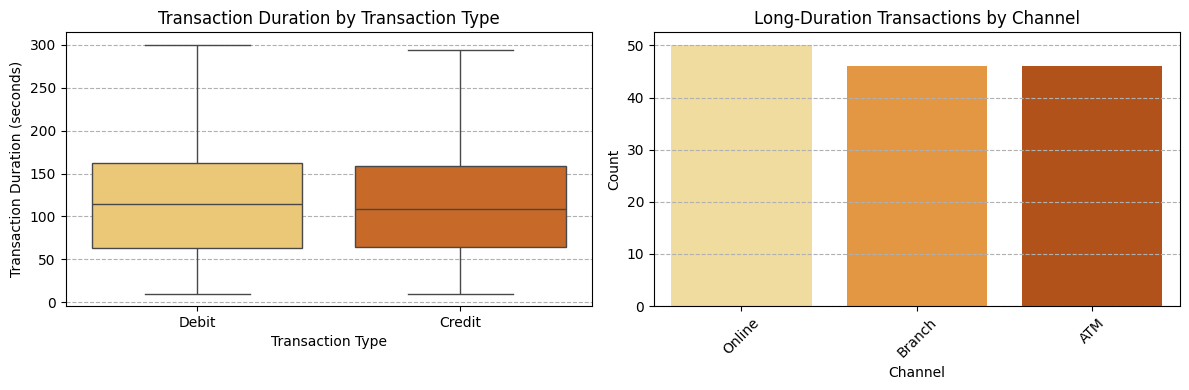

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Boxplot of Transaction Duration by Transaction Type
sns.boxplot(ax=axes[0], x='TransactionType', y='TransactionDuration', data=df, palette='YlOrBr')
axes[0].set_title('Transaction Duration by Transaction Type')
axes[0].set_xlabel('Transaction Type')
axes[0].set_ylabel('Transaction Duration (seconds)')
axes[0].grid(axis='y', linestyle='--')

# Countplot of Long-Duration Transactions by Channel
channel_order = long_duration_transactions['Channel'].value_counts().index
sns.countplot(ax=axes[1], data=long_duration_transactions, x='Channel', order=channel_order, palette='YlOrBr')
axes[1].set_title('Long-Duration Transactions by Channel')
axes[1].set_xlabel('Channel')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

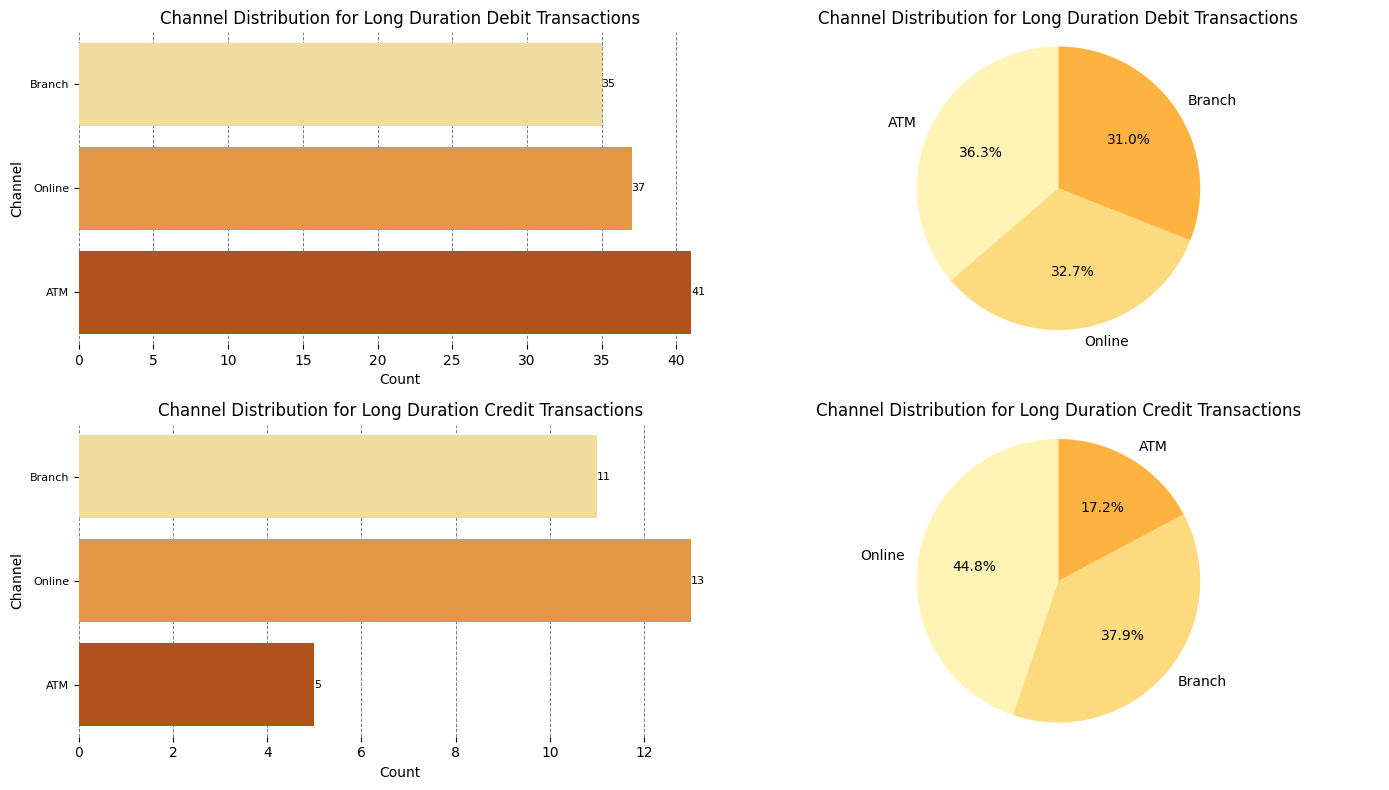

In [75]:
def plot_long_duration_channel_visualization(ax, df, transaction_type):
    """Plots channel distribution for long duration transactions of a given transaction type using countplot and pie chart."""

    filtered_data = df[(df['TransactionType'] == transaction_type) & (df['TransactionDuration'] > df['TransactionDuration'].mean() + 2 * df['TransactionDuration'].std())]
    sns.countplot(y='Channel', data=filtered_data, ax=ax[0], palette='YlOrBr')
    ax[0].set_title(f'Channel Distribution for Long Duration {transaction_type} Transactions')
    ax[0].set_xlabel('Count')
    ax[0].set_ylabel('Channel')
    ax[0].tick_params(axis='y', labelsize=8)

    for p in ax[0].patches:
        ax[0].annotate(f'{int(p.get_width())}',
                        (p.get_width(), p.get_y() + p.get_height() / 2),
                        ha='left', va='center',
                        color='black', fontsize=8)

    ax[0].set_axisbelow(True)
    ax[0].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)
    sns.despine(left=True, bottom=True)

    # Pie Chart
    channel_counts = filtered_data['Channel'].value_counts()
    ax[1].pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('YlOrBr'))
    ax[1].set_title(f'Channel Distribution for Long Duration {transaction_type} Transactions')
    ax[1].axis('equal')

unique_transaction_types = df['TransactionType'].unique()
num_transaction_types = len(unique_transaction_types)

fig, axes = plt.subplots(num_transaction_types, 2, figsize=(14, 4 * num_transaction_types))

for i, transaction_type in enumerate(unique_transaction_types):
    plot_long_duration_channel_visualization(axes[i], df, transaction_type)

plt.tight_layout()
plt.show()

In [76]:
# Identify transactions with unusually long durations
long_duration_threshold = df['TransactionDuration'].quantile(0.95)  # Top 5% as threshold
long_duration_transactions = df[df['TransactionDuration'] > long_duration_threshold]
print(f"Number of transactions with long duration (top 5%): {len(long_duration_transactions)}")
display(long_duration_transactions.head())

Number of transactions with long duration (top 5%): 123


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange,TransactionHour,TransactionDayOfWeek,Day_of_Week,UniqueLocationsCount
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,...,Retired,291,1,2796.24,2024-11-04 08:10:55,2967.66,17,Monday,Monday,6
25,TX000026,AC00041,7.49,2023-10-20 17:53:13,Credit,Houston,D000671,81.248.235.147,M043,Online,...,Retired,276,1,3634.67,2024-11-04 08:09:44,3642.16,17,Friday,Friday,7
29,TX000030,AC00313,56.17,2023-09-20 16:55:42,Debit,Detroit,D000297,33.28.138.82,M043,Branch,...,Student,283,1,1351.69,2024-11-04 08:08:30,1295.52,16,Wednesday,Wednesday,3
73,TX000074,AC00110,233.92,2023-10-20 16:54:28,Credit,Jacksonville,D000295,152.140.239.181,M046,Online,...,Student,280,1,6537.62,2024-11-04 08:08:45,6771.54,16,Friday,Friday,8
113,TX000114,AC00121,213.76,2023-03-01 17:52:14,Credit,Dallas,D000574,51.250.122.123,M009,ATM,...,Retired,282,1,3528.72,2024-11-04 08:09:36,3742.48,17,Wednesday,Wednesday,2


Number of transactions with long duration (top 5%): 123


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange,TransactionHour,TransactionDayOfWeek,Day_of_Week,UniqueLocationsCount
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,...,Retired,291,1,2796.24,2024-11-04 08:10:55,2967.66,17,Monday,Monday,6
25,TX000026,AC00041,7.49,2023-10-20 17:53:13,Credit,Houston,D000671,81.248.235.147,M043,Online,...,Retired,276,1,3634.67,2024-11-04 08:09:44,3642.16,17,Friday,Friday,7
29,TX000030,AC00313,56.17,2023-09-20 16:55:42,Debit,Detroit,D000297,33.28.138.82,M043,Branch,...,Student,283,1,1351.69,2024-11-04 08:08:30,1295.52,16,Wednesday,Wednesday,3
73,TX000074,AC00110,233.92,2023-10-20 16:54:28,Credit,Jacksonville,D000295,152.140.239.181,M046,Online,...,Student,280,1,6537.62,2024-11-04 08:08:45,6771.54,16,Friday,Friday,8
113,TX000114,AC00121,213.76,2023-03-01 17:52:14,Credit,Dallas,D000574,51.250.122.123,M009,ATM,...,Retired,282,1,3528.72,2024-11-04 08:09:36,3742.48,17,Wednesday,Wednesday,2


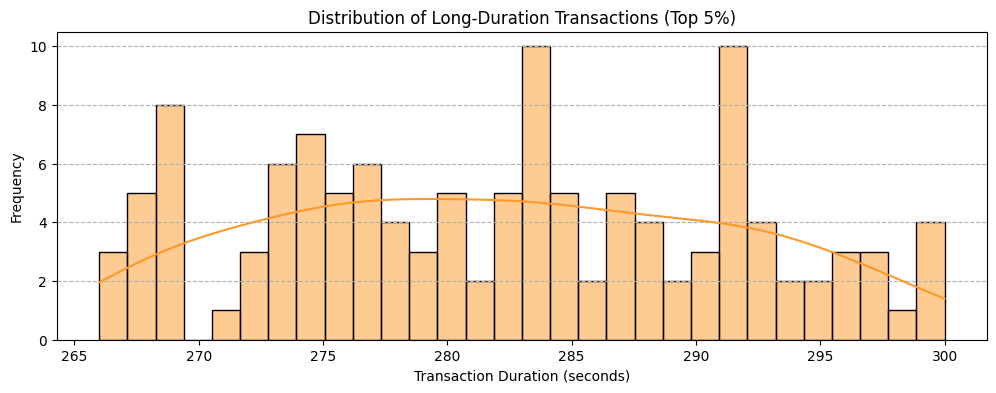

In [77]:
# Identify transactions with unusually long durations
long_duration_threshold = df['TransactionDuration'].quantile(0.95)  # Top 5% as threshold
long_duration_transactions = df[df['TransactionDuration'] > long_duration_threshold]
print(f"Number of transactions with long duration (top 5%): {len(long_duration_transactions)}")
display(long_duration_transactions.head())

# Plot distribution of long-duration transactions
plt.figure(figsize=(12, 4))
sns.histplot(long_duration_transactions['TransactionDuration'], bins=30, kde=True, color=sns.color_palette("YlOrBr", 1)[0])
plt.title('Distribution of Long-Duration Transactions (Top 5%)')
plt.xlabel('Transaction Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()

The histogram illustrates the frequency distribution of transactions within the top 5% of duration, totaling 123 cases. These outliers, clustered primarily between 280 and 295 seconds, highlight suspicious patterns that deviate significantly from standard transaction times, warranting deeper investigation.